### Problem Statement:

#### HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

#### Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

#### Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
hr=pd.read_csv(r'C:\Users\ABC\OneDrive\Desktop\WA_Fn-UseC_-HR-Employee-Attrition.csv')
hr.head(8)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0


In [3]:
hr.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [4]:
hr.shape

(1470, 35)

In [5]:
hr.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [6]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
hr.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

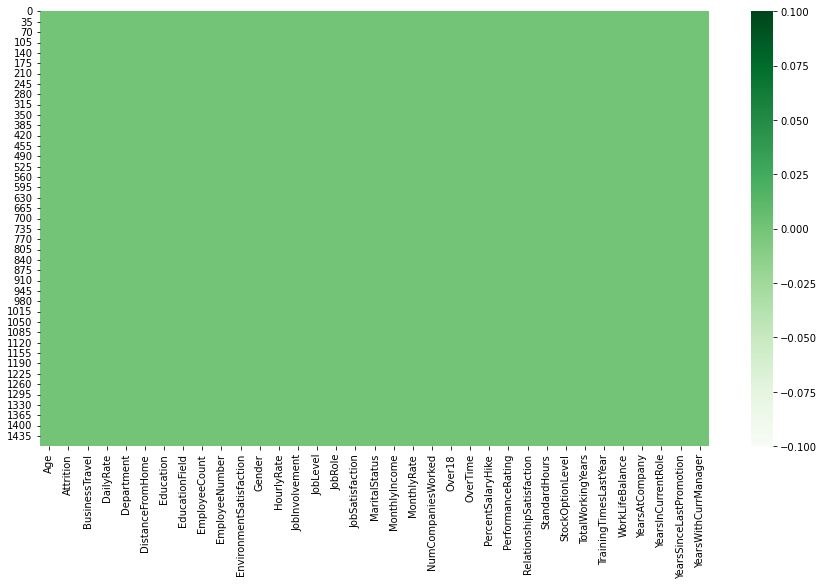

In [8]:
plt.figure(figsize=(15,8))
sns.heatmap(hr.isnull(),cmap='Greens')
plt.show()

### Observation-1

In the above dataset :

1) The size of table is  1470*35 i.e. no. of rows are 1470 and no. of columns are 35(including target).

2) Out of 35 columns 9 columns are continuous in nature and rest 26 are numeric type.

3) Null values are not present in the data set as we can see in ths seaborn heatmap so there is no need to adopt imputation technique.

4) In case of object data type, we will apply the encoding technique to convert the values in the numeric format.

### Setting the target column

In [9]:
hr['Target_Attrition']=hr['Attrition']

In [10]:
hr.drop(['Attrition'],axis=1,inplace=True)

In [11]:
hr.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Target_Attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,...,80,0,8,0,1,6,4,0,5,Yes
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,...,80,1,10,3,3,10,7,1,7,No
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,...,80,0,7,3,3,0,0,0,0,Yes
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,...,80,0,8,3,3,8,7,3,0,No
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,...,80,1,6,3,3,2,2,2,2,No


### Dropping some columns

We are dropping some columns because they are not playing important role towards target columns.

In [12]:
hr.drop(['StandardHours'],axis=1,inplace=True)
hr.drop(['EmployeeCount'],axis=1,inplace=True)
hr.drop(['Over18'],axis=1,inplace=True)
hr.drop(['EmployeeNumber'],inplace=True,axis=1)

In [13]:
hr.shape

(1470, 31)

### Conclusion-2

In order to building best machine learning model we have to remove unnecessary data because it decrease our model performance that is why we dropped four columns....


    Over 18, StandardHours and EmployeeCount column has same values in their particular column like, in Over 18 column only Y was present in all the place.
    
    Similarily, in Standard hours only 80 was present in all the place.
    
    Similarily, in Employee column only 1 was present in all the place.
    
    Employee Number was showing only indexing, which was not necessary for our modeling.

    We set the target column('Attrition') in the last of data frame for easy understanding of output.

.

# EDA
### Exploratory Data Analysis (EDA): 
    EDA process will give us the batter understanding towards the pattern of Dataset

No     1233
Yes     237
Name: Target_Attrition, dtype: int64


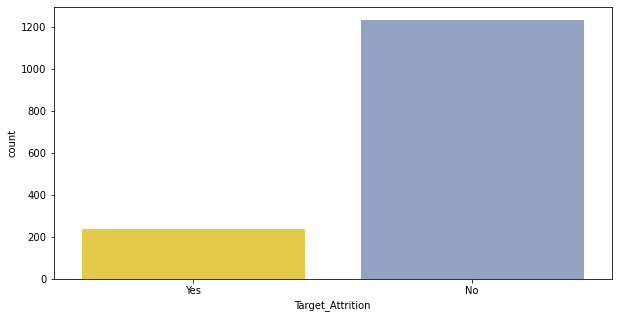

In [14]:
print(hr['Target_Attrition'].value_counts())
plt.figure(figsize=(10,5))
sns.countplot(hr['Target_Attrition'],palette='Set2_r')
plt.show()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


<AxesSubplot:ylabel='Department'>

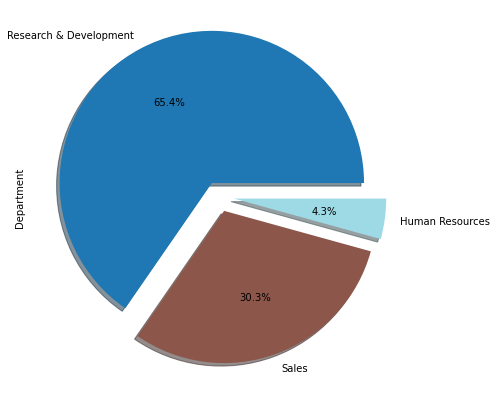

In [15]:
print(hr['Department'].value_counts())
hr.Department.value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct="%1.1f%%",figsize=(7,7),shadow=True,cmap='tab20')

Male      882
Female    588
Name: Gender, dtype: int64


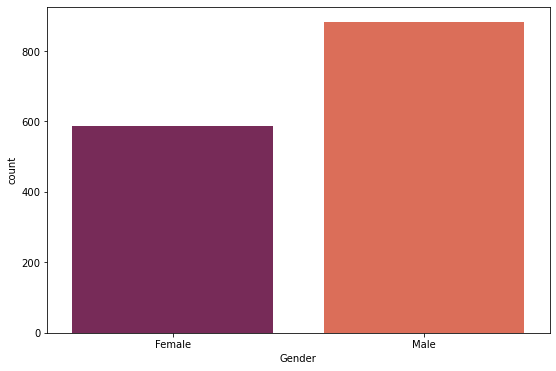

In [16]:
print(hr['Gender'].value_counts())
plt.figure(figsize=(9,6))
sns.countplot(hr['Gender'],palette="rocket")
plt.show()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64


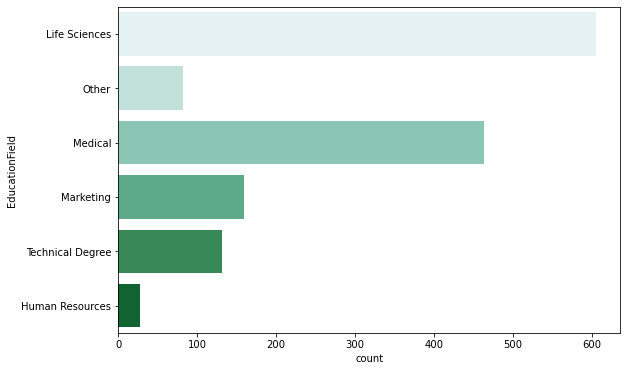

In [17]:
print(hr['EducationField'].value_counts())
plt.figure(figsize=(9,6))
sns.countplot(y=hr['EducationField'],palette="BuGn")
plt.show()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


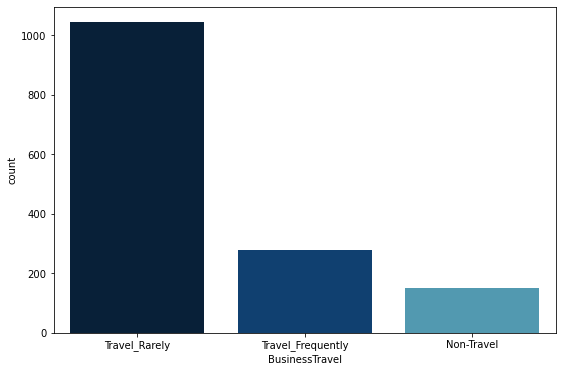

In [18]:
print(hr['BusinessTravel'].value_counts())
plt.figure(figsize=(9,6))
sns.countplot(hr['BusinessTravel'],palette="ocean")
plt.show()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64


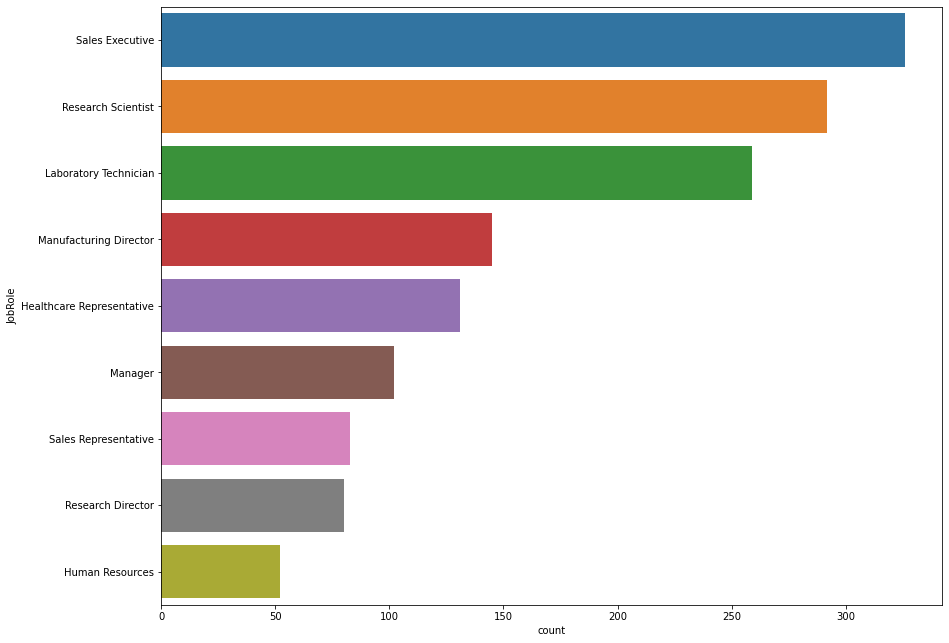

In [19]:
print(hr['JobRole'].value_counts())
plt.figure(figsize=(14,11))
sns.countplot(y=hr['JobRole'])
plt.show()

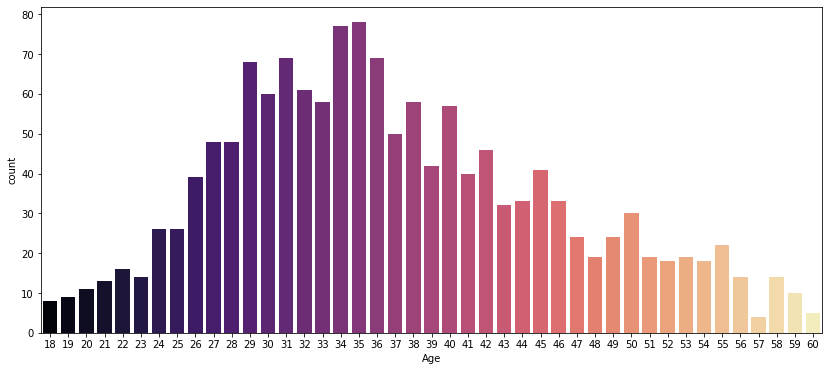

In [20]:
plt.figure(figsize=(14,6))
sns.countplot(hr['Age'],palette='magma')
plt.show()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64


<AxesSubplot:ylabel='MaritalStatus'>

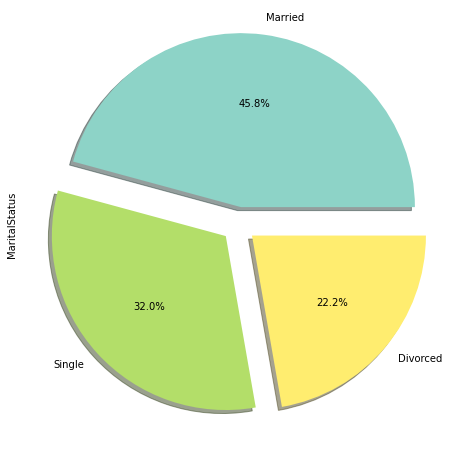

In [21]:
print(hr['MaritalStatus'].value_counts())
hr.MaritalStatus.value_counts().plot.pie(explode=[0.1,0.1,0.1],shadow=True,autopct='%1.1f%%',figsize=(8,8),cmap='Set3')

No     1054
Yes     416
Name: OverTime, dtype: int64


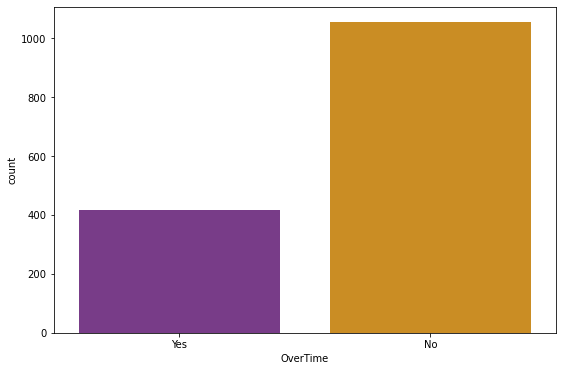

In [22]:
print(hr['OverTime'].value_counts())
plt.figure(figsize=(9,6))
sns.countplot(hr['OverTime'],palette="CMRmap")
plt.show()

### Observation-3

From the above observations we can say that:


    1. Our target column attrition have only two possibility Yes or No.From this we can understand that yes means attrition and no means no attrition.According to the datas set no attrition(1233) is high as comapre to yes(237).

    2. In the department column three types of category we have: 

    Research & Development   
    Sales                    
    Human Resources  
    
    In Research & Development(961) Department majority people works and then sales department(446) has large number of employess as compare to human resources(63).

    3. In company most of the employees are male, number of females are less as comapre to male. in numbers it is around 882 and 588 resp.

    4. In the eductaion filed column, life science and medical background's employee is higher as compare to others.In numbers is is around 606 and 464 resp.

    Some employees belongs to marketing(159) and human resources(27).
    Company has also hired technical background emplyees(132) and some employess are from the other fields(82).


    5. Most of the employees travel rerely(1043) from the company's end but some employees are also there who travel frequently(277) only and few employees are non traveler(150).


    6. Company has 9 types of job roles :

    Sales Executive              
    Research Scientist           
    Laboratory Technician        
    Manufacturing Director       
    Healthcare Representative    
    Manager                      
    Sales Representative         
    Research Director            
    Human Resources  

    Majority of the employees are working for sales executive(326), research scientist(292) and Laboratory Technician(259) position.
    
    Manufacturing Director(154), Healthcare Representative(131) and Manager(102) are working in higher position that is why they are less in numbers as compare to lower position's employess.
    
    sales representative(83), Research director(80) and human resources(80) position are very less.
   
    7. In the age column, we can see that most of the employees whos age is lying between 27-45 year, are working in the company.

    8. Under the MaritalStatus column, result is like this:

    Married     673
    Single      470
    Divorced    327

    Mjority of the employees are married(673) and the numbers of singles are (470).
    
    9. We have a column which shows the employess overtime.
    only few emoployees do over time(416)


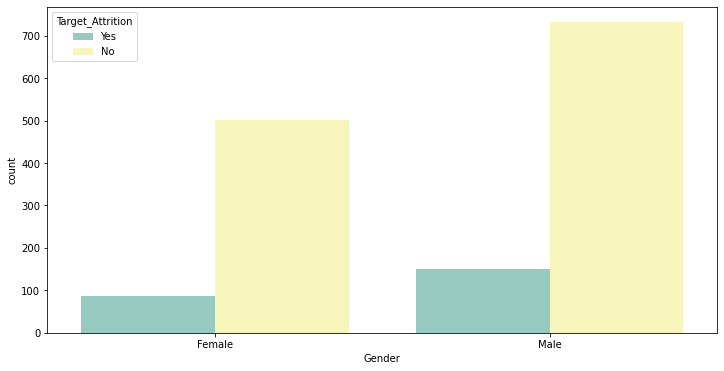

In [23]:
plt.figure(figsize=(12,6)) 
sns.countplot(hr['Gender'], hue=hr['Target_Attrition'],palette='Set3')
plt.show()

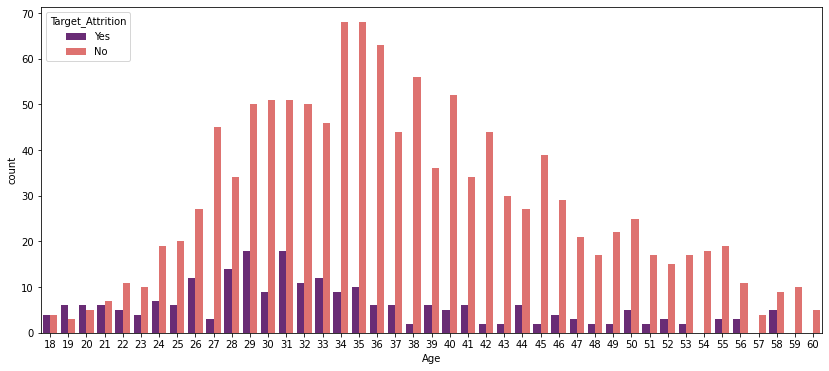

In [24]:
plt.figure(figsize=(14,6))
sns.countplot(hr['Age'], hue=hr['Target_Attrition'],palette='magma')
plt.show()

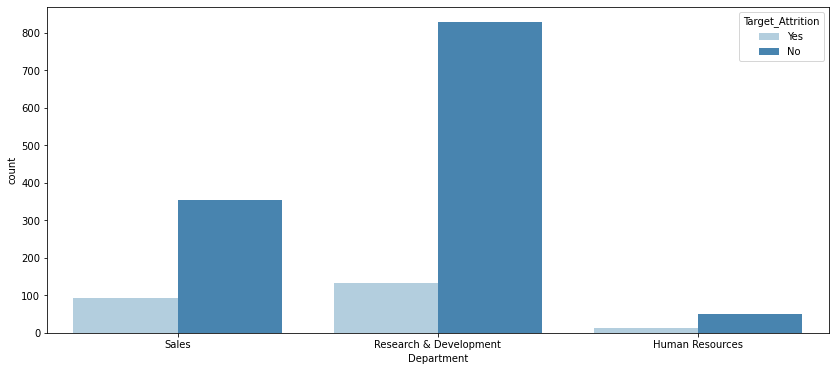

In [25]:
plt.figure(figsize=(14,6))
sns.countplot(hr['Department'], hue=hr['Target_Attrition'],palette='Blues')
plt.show()

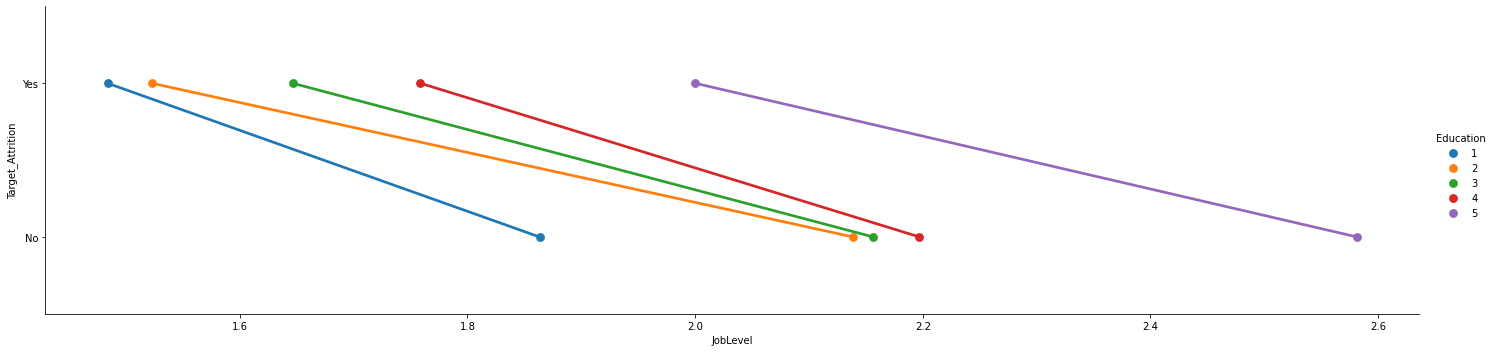

In [26]:
sns.factorplot(x = 'JobLevel', y = 'Target_Attrition', hue = 'Education', data=hr, aspect= 4, ci=None)

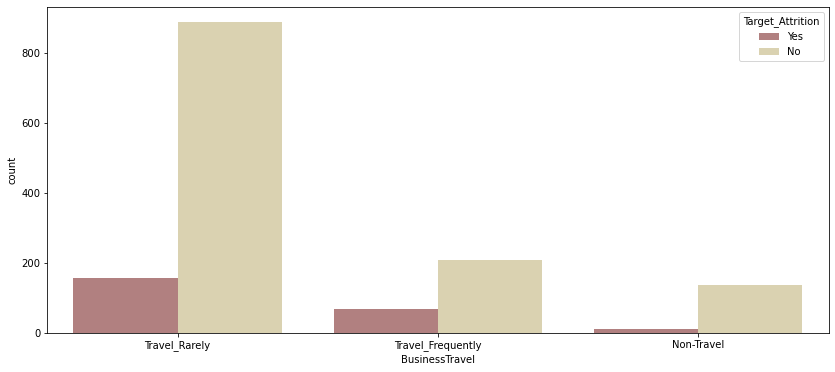

In [27]:
plt.figure(figsize=(14,6))
sns.countplot(hr['BusinessTravel'], hue=hr['Target_Attrition'],palette='pink')
plt.show()

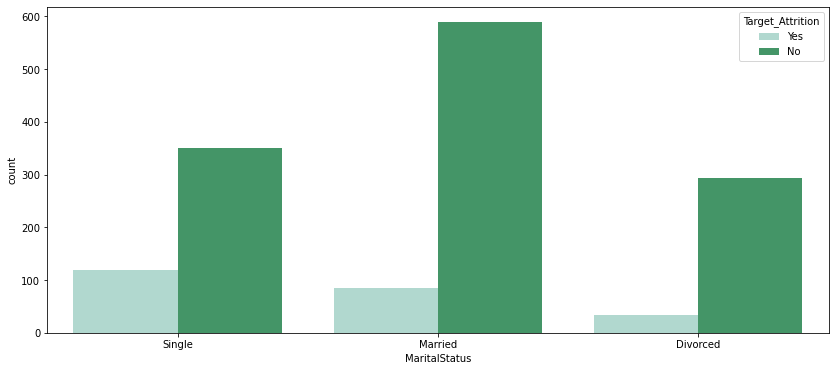

In [28]:
plt.figure(figsize=(14,6))
sns.countplot(hr['MaritalStatus'], hue=hr['Target_Attrition'],palette='BuGn')
plt.show()

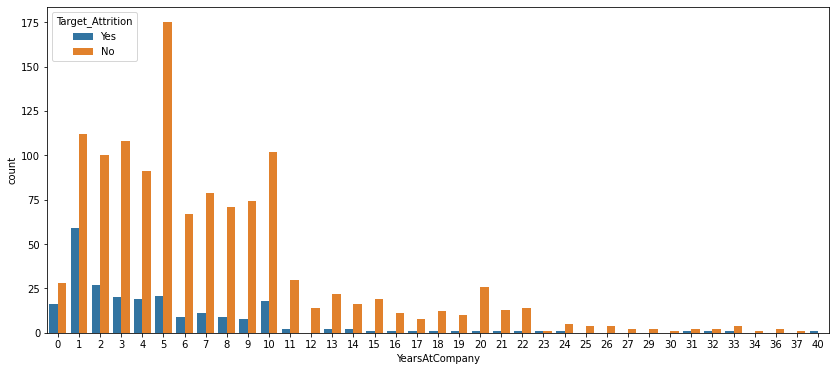

In [29]:
plt.figure(figsize=(14,6))
sns.countplot(hr['YearsAtCompany'], hue=hr['Target_Attrition'],palette='tab10')
plt.show()

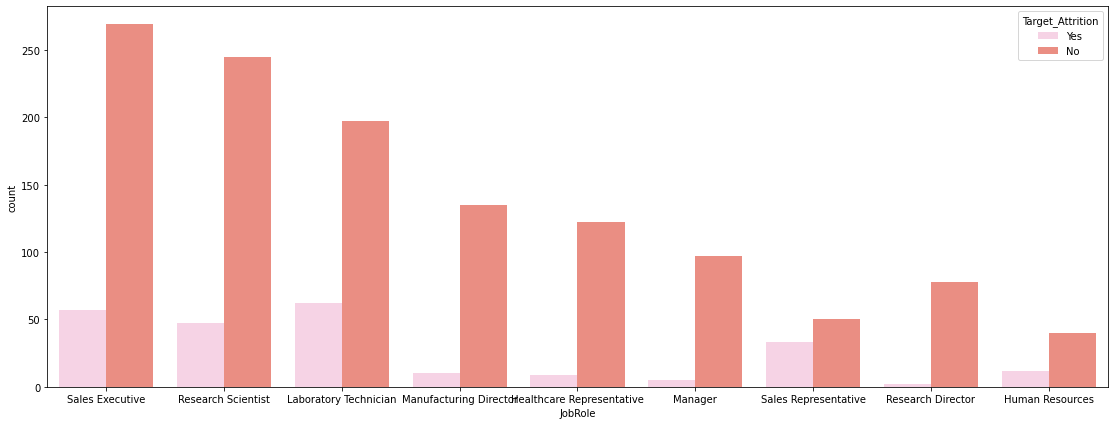

In [30]:
plt.figure(figsize=(19,7))
sns.countplot(hr['JobRole'], hue=hr['Target_Attrition'],palette='Set3_r')
plt.show()

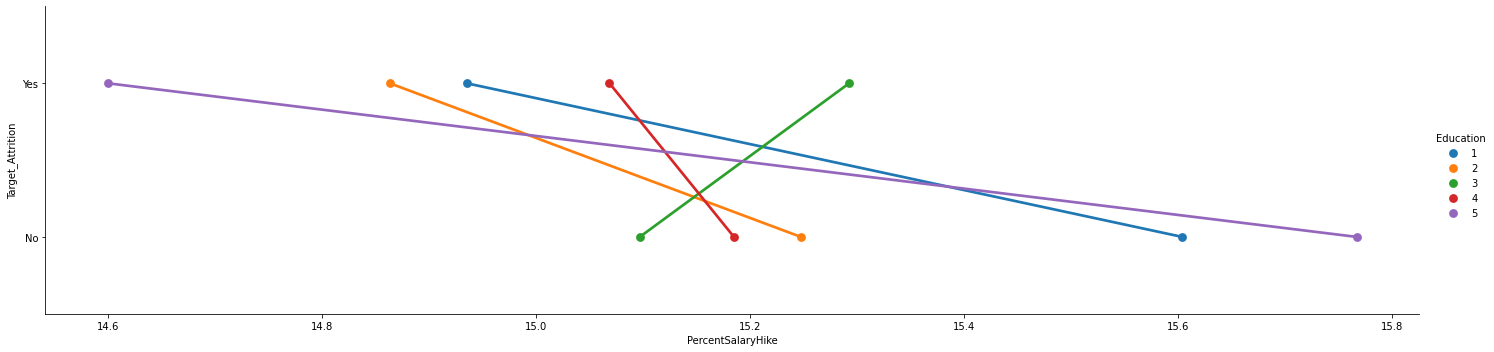

In [31]:
sns.factorplot(x = 'PercentSalaryHike', y = 'Target_Attrition', hue = 'Education', data=hr, aspect= 4, ci=None)

### Observation-3

From the above observations :
    
  ##### 1.Target vs Gender -
  
      Attrition rate is higher in the male side because the population of male is also larger as compare to female.
      
      Attrition rate is less in female side because the population of female is also small. 
      
  ##### 2.Target vs Age -
  
      From the age of 26 to 37 the density of attrition is higher as compare to other age group.
      From the age of 37 to 60 the attrition is very less.
      
  ##### 3.Target vs Department -    
  
      Attrition rate is higher in the department of research and development as compare to sales and human resources and the intresting fact is this attrition rate is negligable in the human resources.
     
   ##### 4.Target vs BusinessTravel - 
   
       We can see in the target vs business travel column, the attritation rate is higher in travel_rarely employee side and lesser in non-travel employee side.
      
   ##### 5.Target vs Marital status -
   
       Attrition rate is higher in singles then married then devorced employees.
       
   ##### 6.Target vs YearsAtCompany - 
   
      The chances of attrition rate will rise if a employee sepnds less then 10 years in a company.
      
   ##### 7.Target vs jobrole - 
   
       Attrition rate is high in the designation of sales executive, laboratory technician, research scientist and sales repreesentative as compare to other designation.
       
   ##### 7.Target vs joblevel - 
   
       When the job level is increases simultaneously attrition rate of diffremt diffrent education level is also decreases.

#### To begin with we are converting the object type data into a numeric format, So we can take those columns in our further process

### Adopting Encoding technique

In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
le=LabelEncoder()

In [34]:
enco=["BusinessTravel",'Department','EducationField','Gender','JobRole','MaritalStatus','OverTime','Target_Attrition']

for i in enco:
    hr[i]=le.fit_transform(hr[i])

In [35]:
hr

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Target_Attrition
0,41,2,1102,2,1,2,1,2,0,94,...,1,0,8,0,1,6,4,0,5,1
1,49,1,279,1,8,1,1,3,1,61,...,4,1,10,3,3,10,7,1,7,0
2,37,2,1373,1,2,2,4,4,1,92,...,2,0,7,3,3,0,0,0,0,1
3,33,1,1392,1,3,4,1,4,0,56,...,3,0,8,3,3,8,7,3,0,0
4,27,2,591,1,2,1,3,1,1,40,...,4,1,6,3,3,2,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1,884,1,23,2,3,3,1,41,...,3,1,17,3,3,5,2,0,3,0
1466,39,2,613,1,6,1,3,4,1,42,...,1,1,9,5,3,7,7,1,7,0
1467,27,2,155,1,4,3,1,2,1,87,...,2,1,6,0,3,6,2,0,3,0
1468,49,1,1023,2,2,3,3,4,1,63,...,4,0,17,3,2,9,6,0,8,0


.

### Checking Outliers

In [36]:
hr.describe()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Target_Attrition
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,1.607483,802.485714,1.260544,9.192517,2.912925,2.247619,2.721769,0.600000,65.891156,...,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129,0.161224
std,9.135373,0.665455,403.509100,0.527792,8.106864,1.024165,1.331369,1.093082,0.490065,20.329428,...,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136,0.367863
min,18.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,30.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,1.000000,465.000000,1.000000,2.000000,2.000000,1.000000,2.000000,0.000000,48.000000,...,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.000000
50%,36.000000,2.000000,802.000000,1.000000,7.000000,3.000000,2.000000,3.000000,1.000000,66.000000,...,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,0.000000
75%,43.000000,2.000000,1157.000000,2.000000,14.000000,4.000000,3.000000,4.000000,1.000000,83.750000,...,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000,0.000000
max,60.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,4.000000,1.000000,100.000000,...,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,1.000000


Age                           AxesSubplot(0.125,0.749828;0.227941x0.130172)
BusinessTravel             AxesSubplot(0.398529,0.749828;0.227941x0.130172)
DailyRate                  AxesSubplot(0.672059,0.749828;0.227941x0.130172)
Department                    AxesSubplot(0.125,0.593621;0.227941x0.130172)
DistanceFromHome           AxesSubplot(0.398529,0.593621;0.227941x0.130172)
Education                  AxesSubplot(0.672059,0.593621;0.227941x0.130172)
EducationField                AxesSubplot(0.125,0.437414;0.227941x0.130172)
EnvironmentSatisfaction    AxesSubplot(0.398529,0.437414;0.227941x0.130172)
Gender                     AxesSubplot(0.672059,0.437414;0.227941x0.130172)
HourlyRate                    AxesSubplot(0.125,0.281207;0.227941x0.130172)
JobInvolvement             AxesSubplot(0.398529,0.281207;0.227941x0.130172)
JobLevel                   AxesSubplot(0.672059,0.281207;0.227941x0.130172)
JobRole                          AxesSubplot(0.125,0.125;0.227941x0.130172)
JobSatisfact

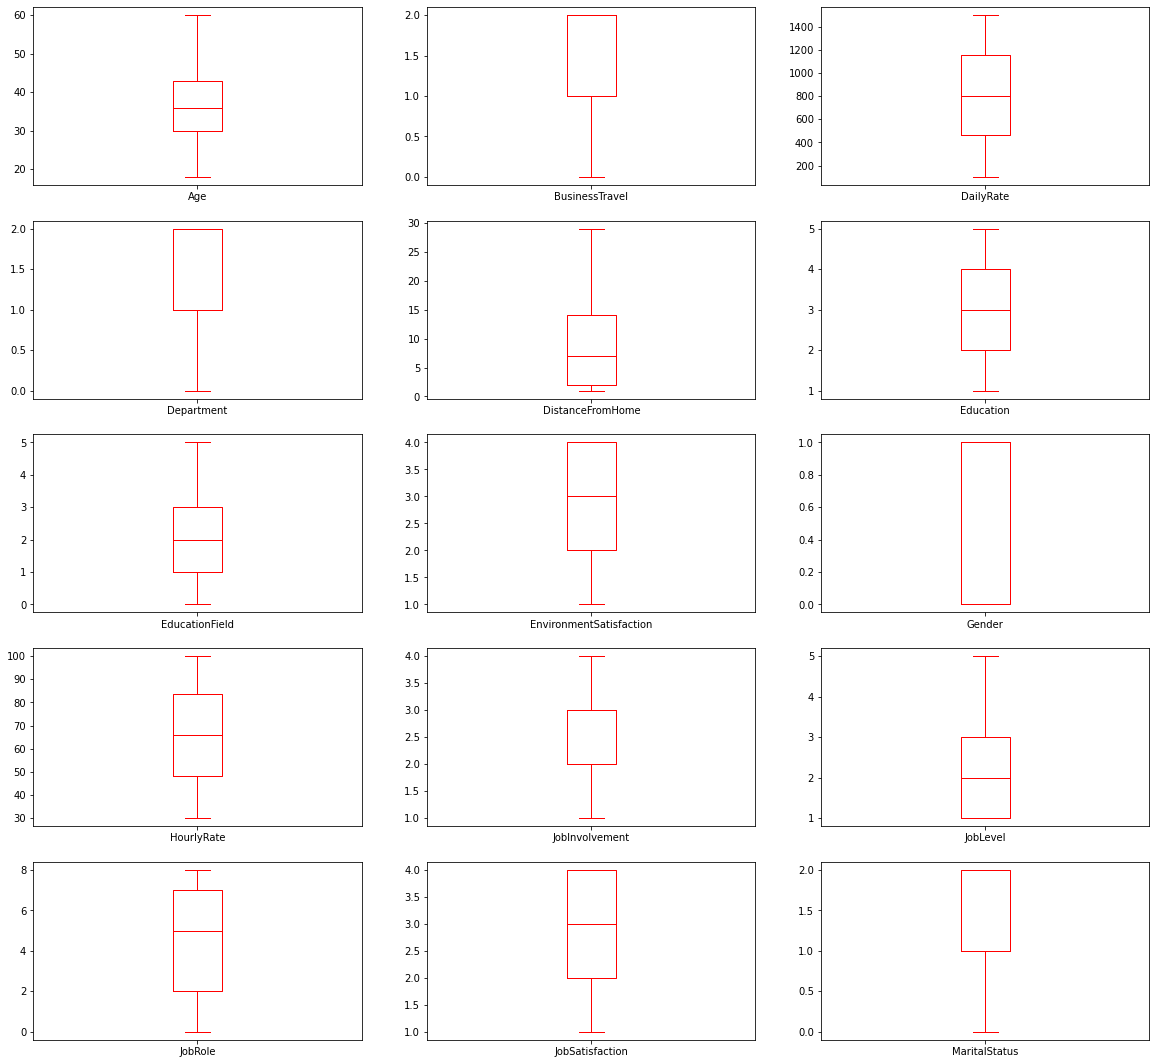

In [37]:
hr.iloc[:,0:15].plot(kind='box',subplots=True,layout=(5,3),figsize=[20,19],color='r')

MonthlyIncome                  AxesSubplot(0.125,0.772143;0.227941x0.107857)
MonthlyRate                 AxesSubplot(0.398529,0.772143;0.227941x0.107857)
NumCompaniesWorked          AxesSubplot(0.672059,0.772143;0.227941x0.107857)
OverTime                       AxesSubplot(0.125,0.642714;0.227941x0.107857)
PercentSalaryHike           AxesSubplot(0.398529,0.642714;0.227941x0.107857)
PerformanceRating           AxesSubplot(0.672059,0.642714;0.227941x0.107857)
RelationshipSatisfaction       AxesSubplot(0.125,0.513286;0.227941x0.107857)
StockOptionLevel            AxesSubplot(0.398529,0.513286;0.227941x0.107857)
TotalWorkingYears           AxesSubplot(0.672059,0.513286;0.227941x0.107857)
TrainingTimesLastYear          AxesSubplot(0.125,0.383857;0.227941x0.107857)
WorkLifeBalance             AxesSubplot(0.398529,0.383857;0.227941x0.107857)
YearsAtCompany              AxesSubplot(0.672059,0.383857;0.227941x0.107857)
YearsInCurrentRole             AxesSubplot(0.125,0.254429;0.227941x0.107857)

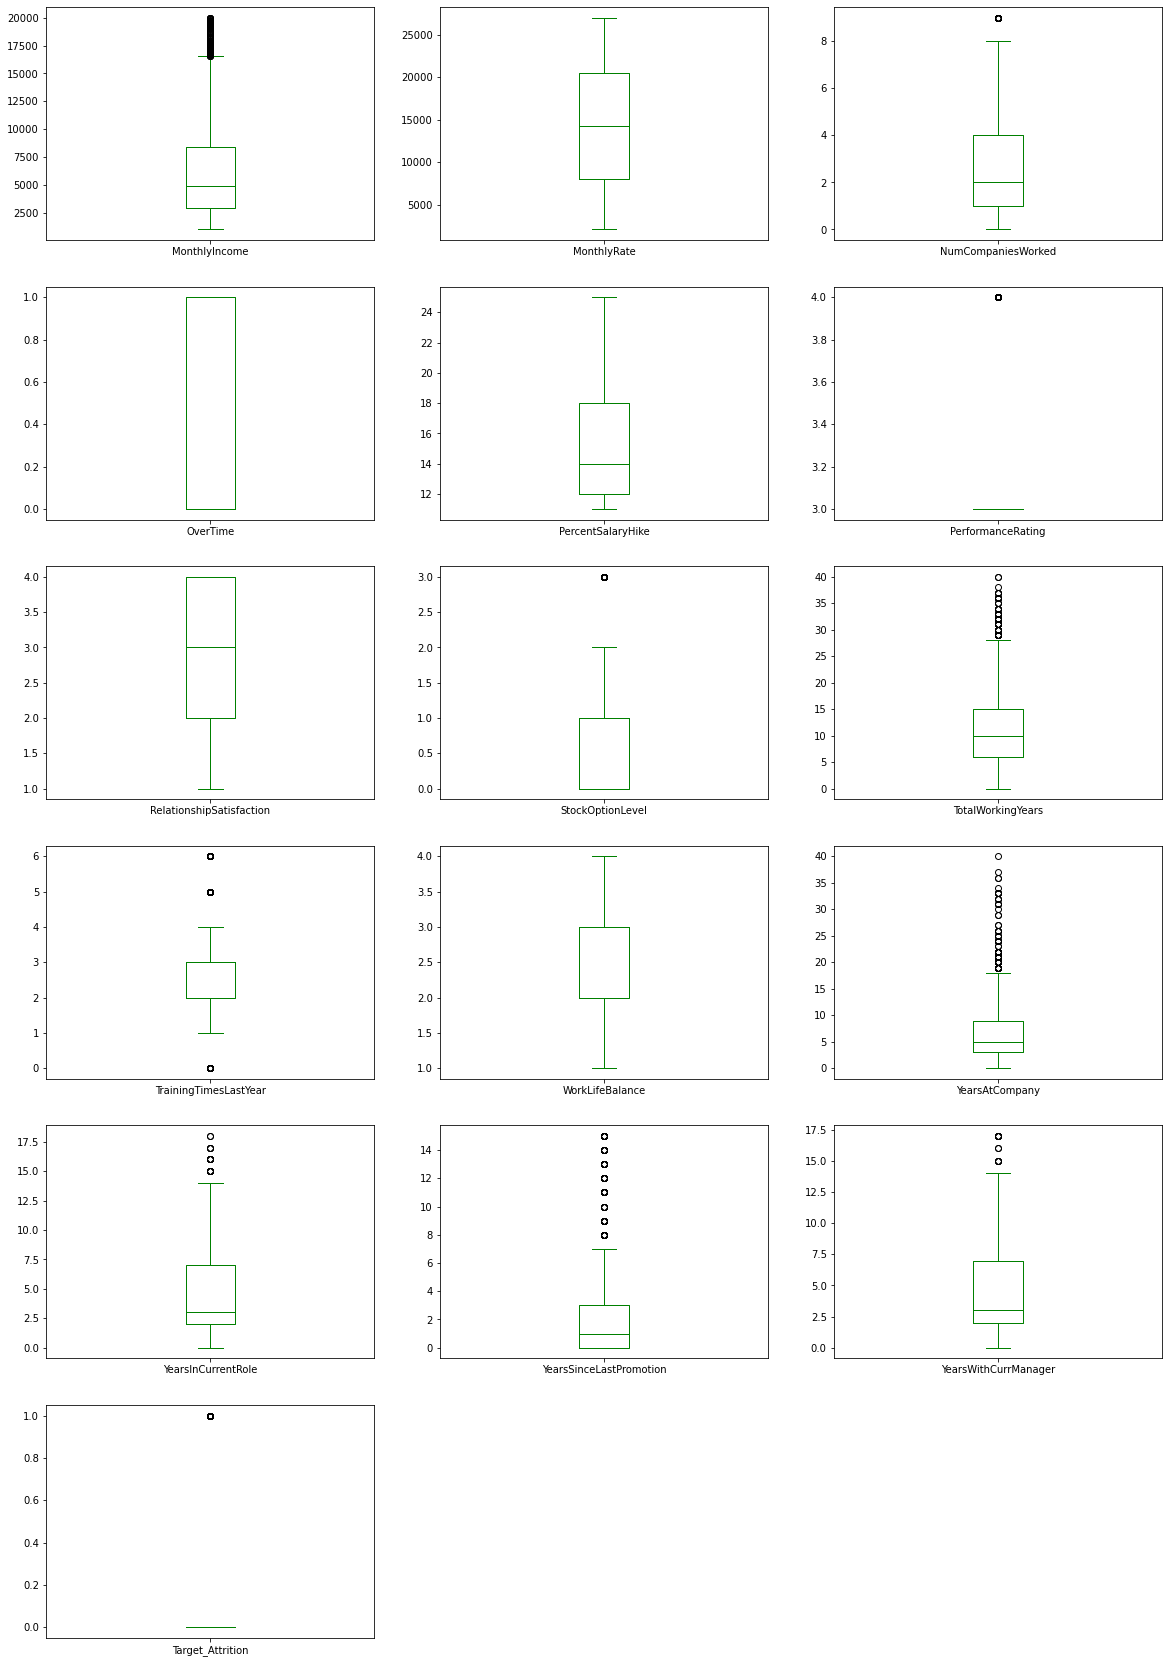

In [38]:
hr.iloc[:,15:].plot(kind='box',subplots=True,layout=(6,3),figsize=[20,30],color='g')

### Observation-4

In the above datasets some columns have outliers.

1) As we can see the Monthly income columns has outliers, for example mean is 6502.93 while maximum values is 19999.This mean is sensitive to outliersbut the fact that mean is so small compared to the max value indicates the outliers are peresnt.
                 And also the diffrence between mean(6502) and std(4707) is very high in this column, shows the data are highly spreaded, So the chance of outlier are also present.
                 
2) Simililarly in the NUmCompaniesWorked column the gap between maximum value and  mean is high, So we can say some outliers are present in the column.

3) YearsAtCompany and TotalWorkingYears ar the columns where chances of outliers are present, because in those column sdata are highly spreaded.

4) In thee YearsWithCurrManager and the YearsSinceLastPromotion columns data are spreaded because of less mean and high maximum values, that is why we can say that some outliers are definitely present in these columns.

In [39]:
Outliers_present=['MonthlyIncome','NumCompaniesWorked','PerformanceRating',
                  'StockOptionLevel','TotalWorkingYears','YearsAtCompany','YearsSinceLastPromotion',
                  'YearsWithCurrManager','YearsInCurrentRole','TrainingTimesLastYear']

.

## Checking skewness:

In [40]:
from scipy.stats import skew

In [41]:
hr.skew()

Age                         0.413286
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
Y

Age
0.41286446154785084


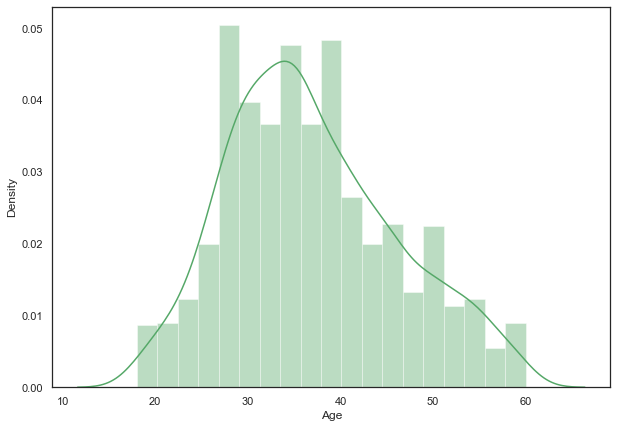

BusinessTravel
-1.4375371829186814


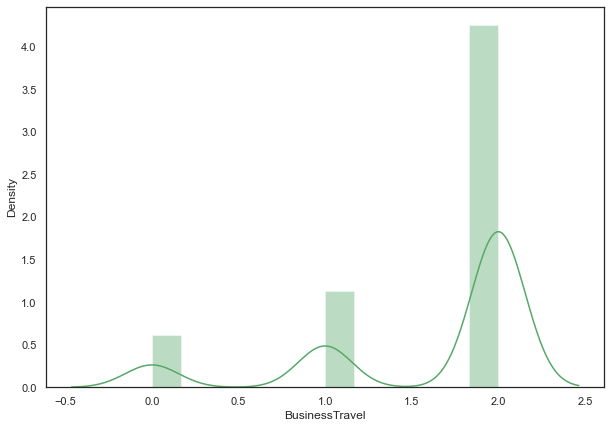

DailyRate
-0.003514976958291024


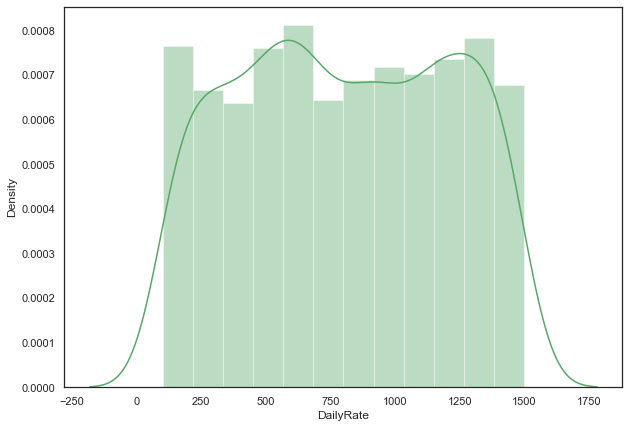

Department
0.17205501555446084


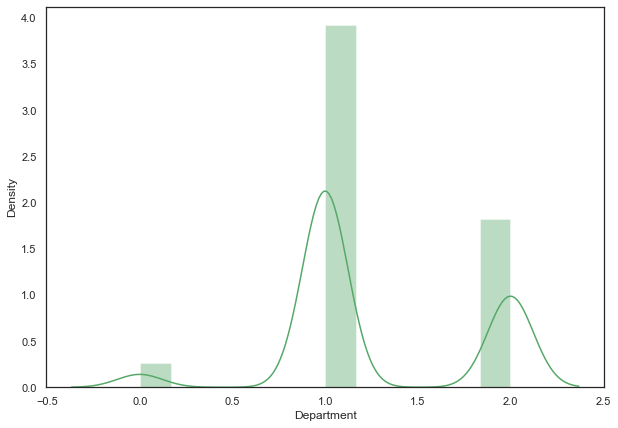

DistanceFromHome
0.9571400469829039


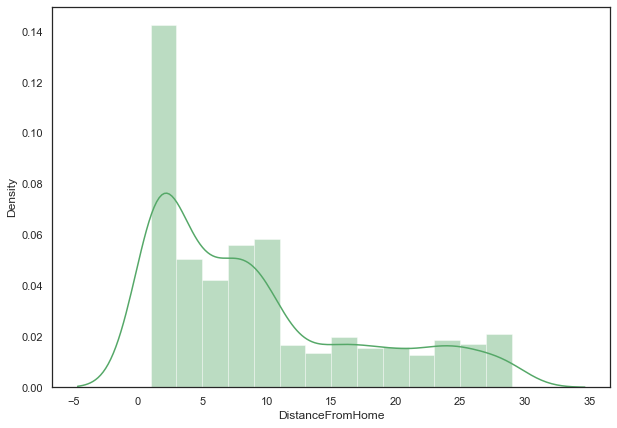

Education
-0.2893854052028825


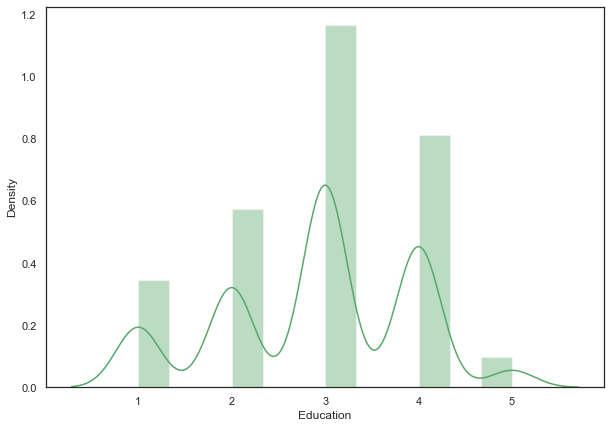

EducationField
0.5498094865361756


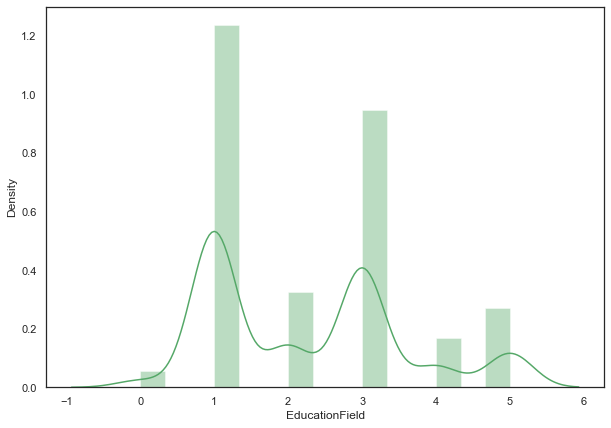

EnvironmentSatisfaction
-0.3213261358382832


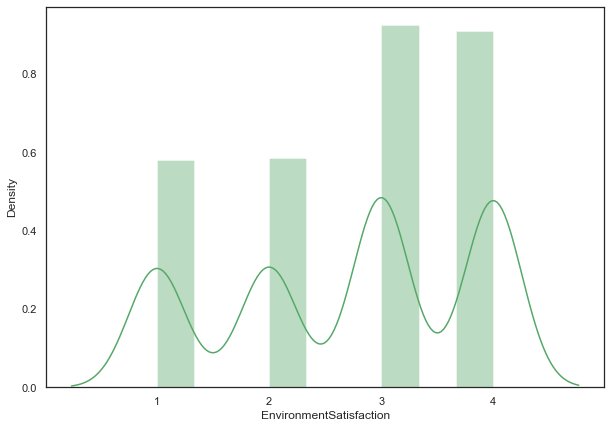

Gender
-0.4082482904638628


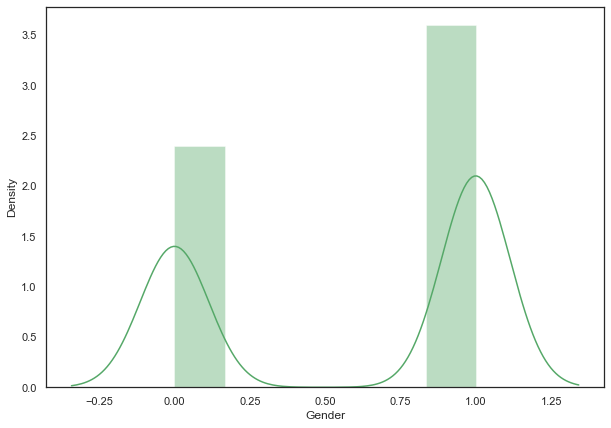

HourlyRate
-0.03227797319055416


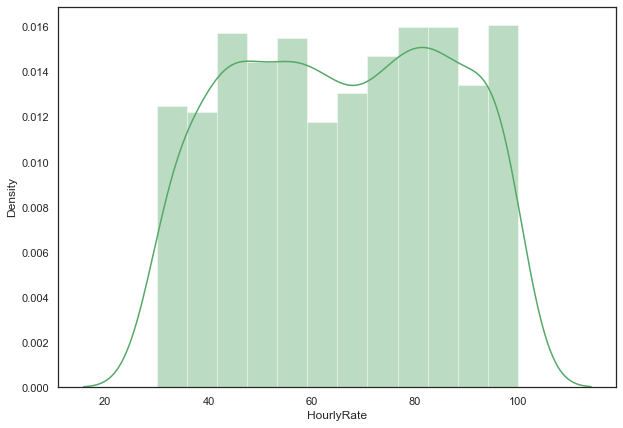

JobInvolvement
-0.4979106286269671


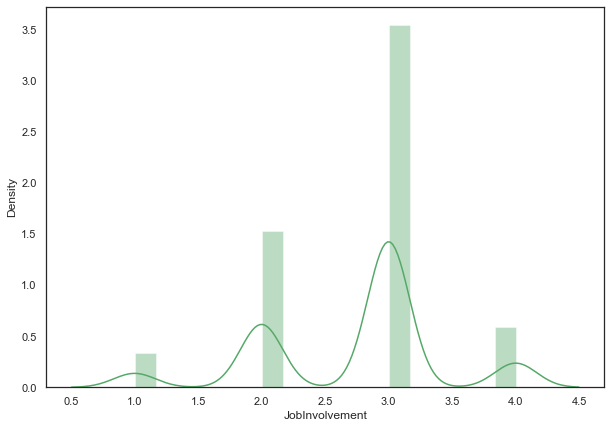

JobLevel
1.0243546583925869


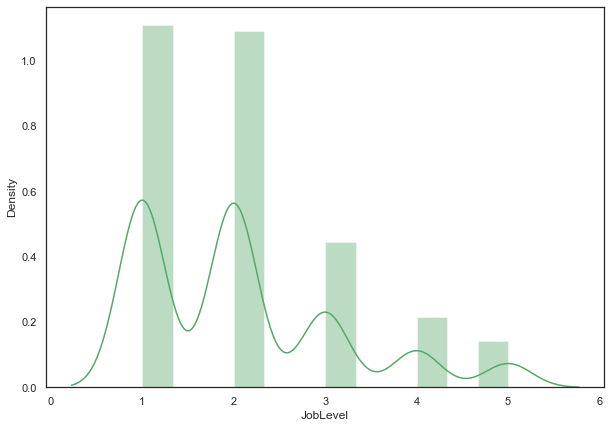

JobRole
-0.3569052550383217


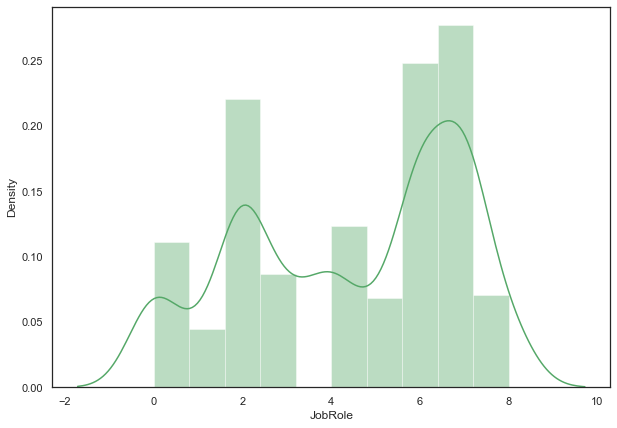

JobSatisfaction
-0.3293354633089524


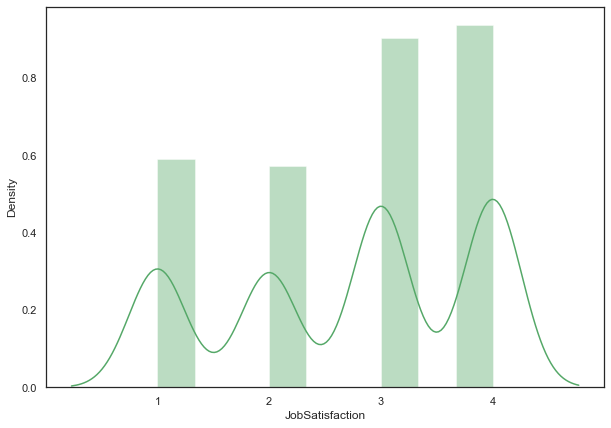

MaritalStatus
-0.15201929651271306


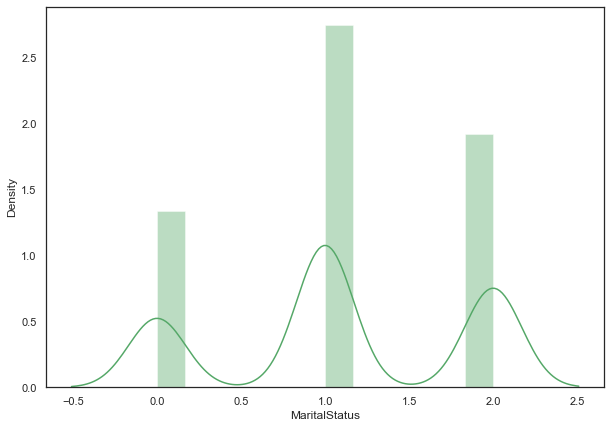

MonthlyIncome
1.3684185123330814


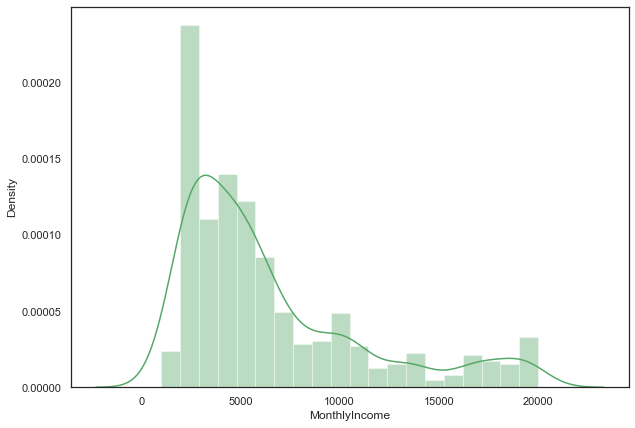

MonthlyRate
0.01855884556846042


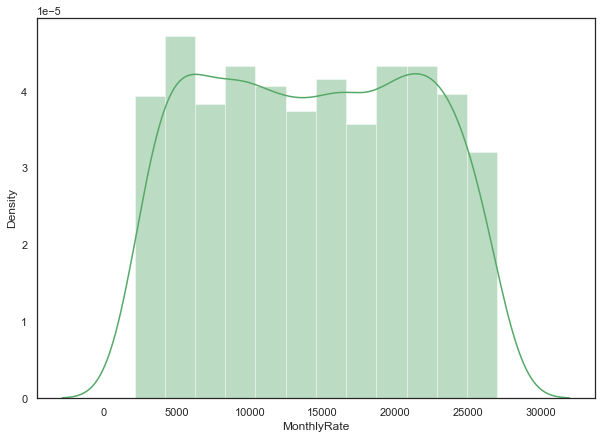

NumCompaniesWorked
1.0254233954371303


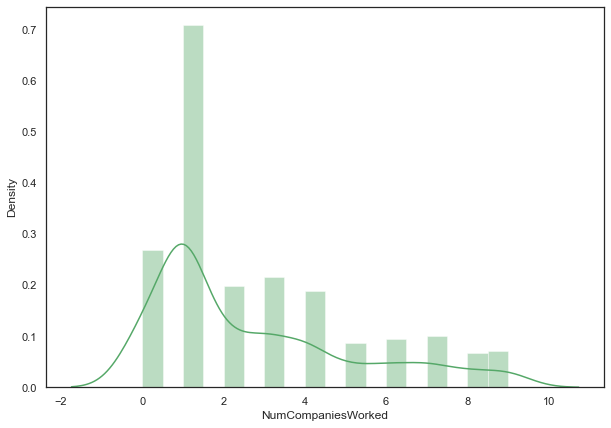

OverTime
0.963504412638946


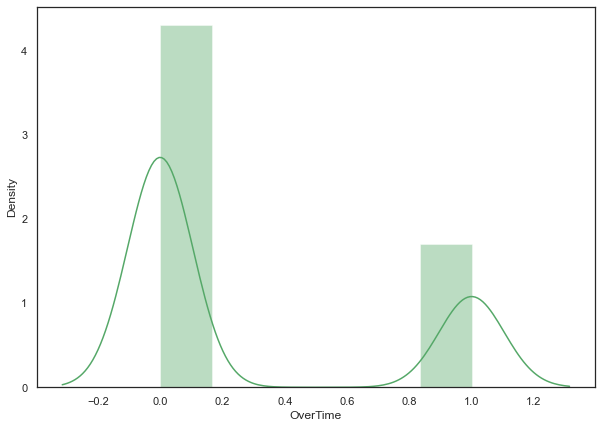

PercentSalaryHike
0.8202898522796266


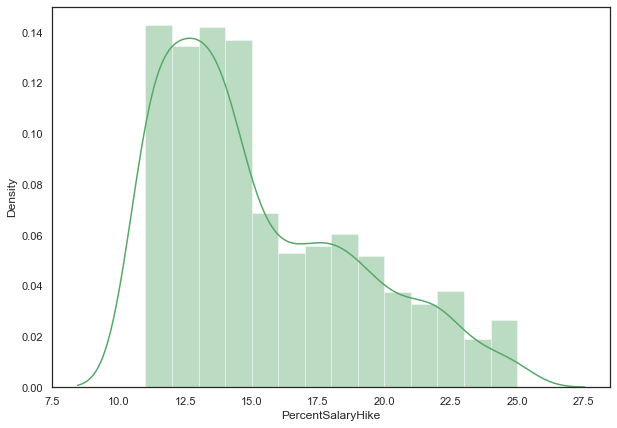

PerformanceRating
1.9199210412109473


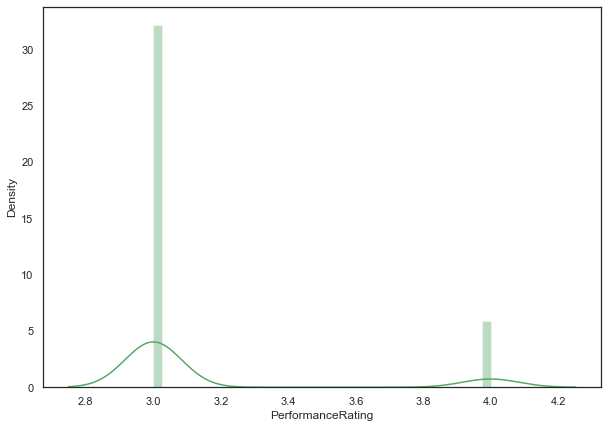

RelationshipSatisfaction
-0.3025184698222079


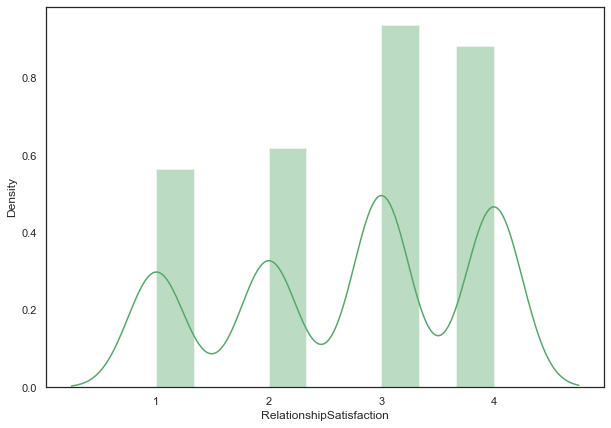

StockOptionLevel
0.9679912809556104


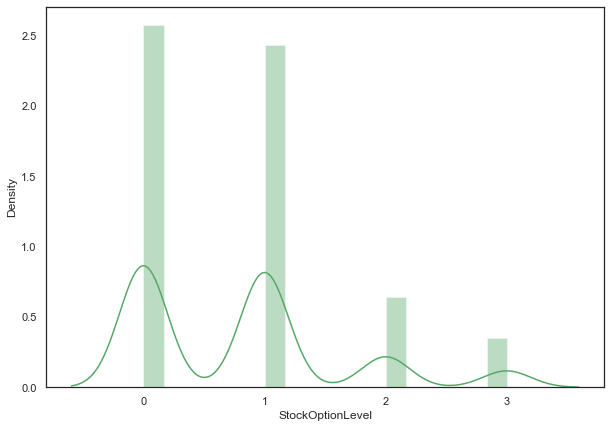

TotalWorkingYears
1.11603155825941


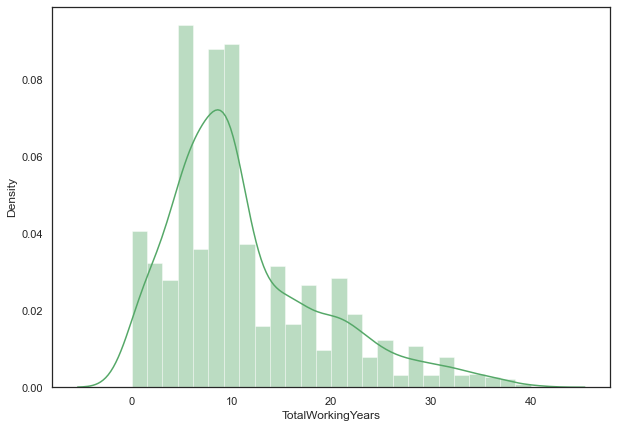

TrainingTimesLastYear
0.5525595985771926


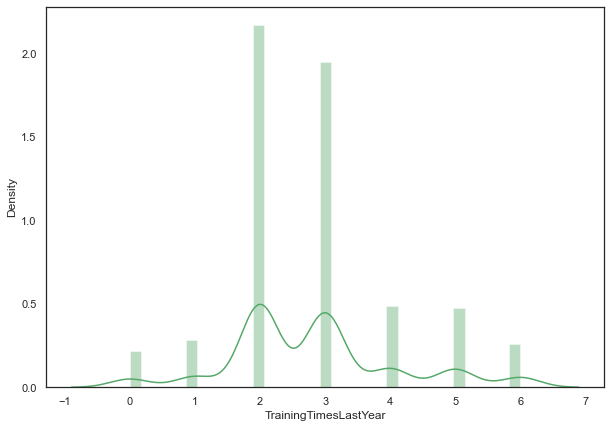

WorkLifeBalance
-0.5519163838185224


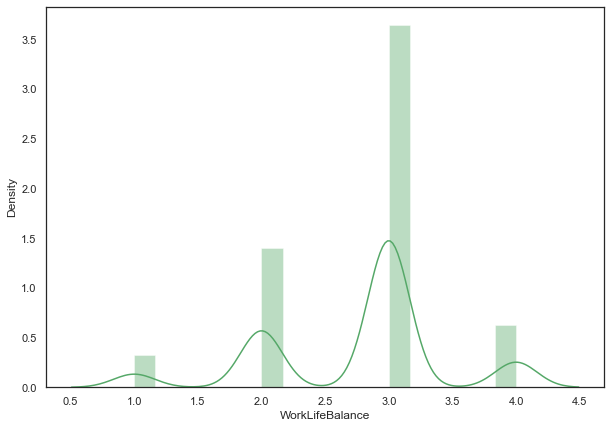

YearsAtCompany
1.7627284034822992


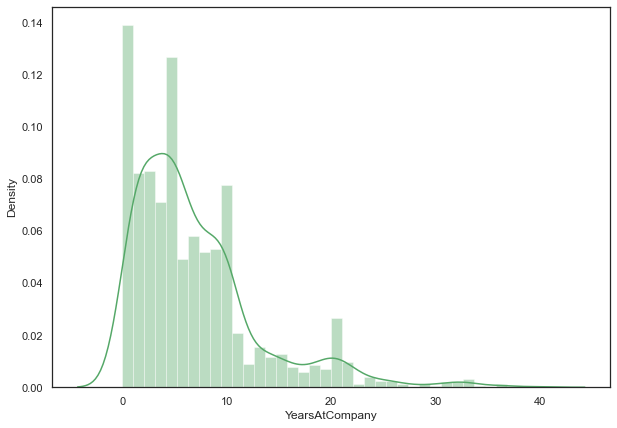

YearsInCurrentRole
0.9164268059808774


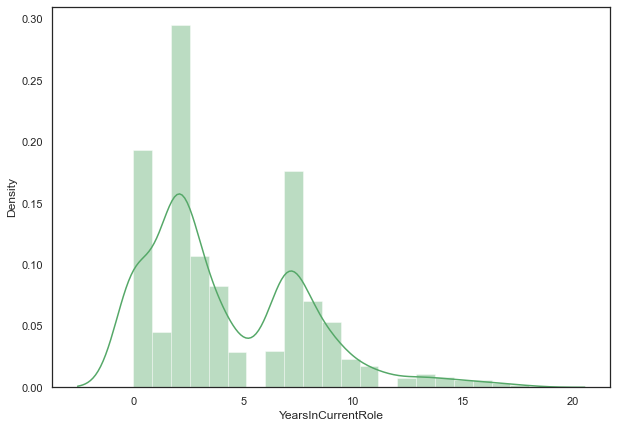

YearsSinceLastPromotion
1.982264623462895


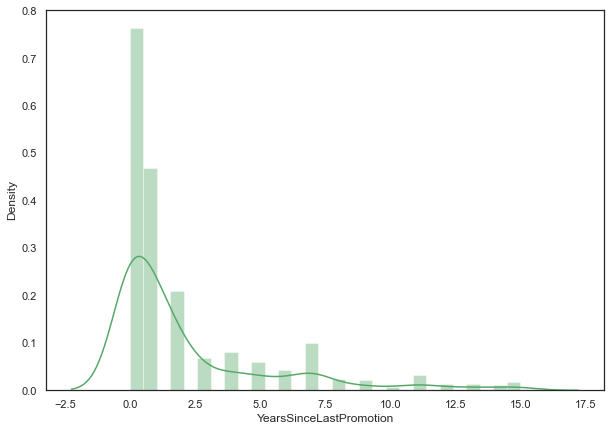

YearsWithCurrManager
0.8326002906209379


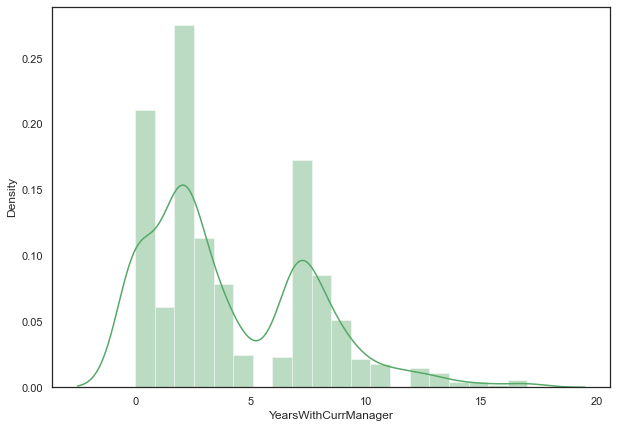

Target_Attrition
1.842483584049465


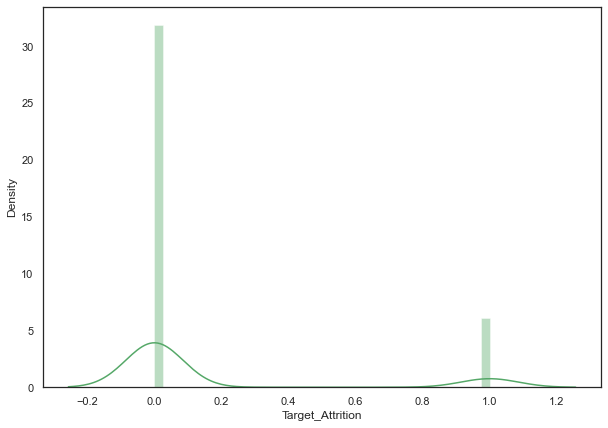

In [42]:
for i in hr:
    print(i)
    print(skew(hr[i]))
    
    sns.set_theme(style="white")
    plt.figure(figsize=(10,7))
    sns.distplot(hr[i],color='g')
    plt.show()
    

### Observation-5:

In the above dataset most of the columns has skewness :

* High skewness represents data imbalancy.

* Less skewness represents that our data are equally distributed.

1. In the BusinessTravel column skewness is present but skewness is present in the form of negative direction i.e. -1.43 .


2. DistanceFromHome column has also skewed(0.95) that means the data are not equally distributed.

 
3. OverTime column is showing 0.96 skewness i.e. the condition of data imbalancy is present.


4. In NumCompaniesWorked column the data are highly skewed(1.02).


5. High skewness is present in the JobLevel(1.02) and MonthlyIncome(1.36).


6. PercentSalaryHike(0.82) and PerformanceRating(1.92) columns showing highly skewed data.


7. Similarly in StockOptionLevel(0.96), TotalWorkingYears(-1.11), YearsAtCompany(1.76),YearsInCurrentRole(0.91) and    YearsSinceLastPromotion(1.98) columns showing high skewness. 
    



.

## Checking Correlation

### We will check correlation in 2 ways:
    
   ### 1.Correlation between the each colunm with target colunm.
   ### 2.Correlation between the colunms.

In [43]:
hr.corr()['Target_Attrition'].sort_values()

TotalWorkingYears          -0.171063
JobLevel                   -0.169105
YearsInCurrentRole         -0.160545
MonthlyIncome              -0.159840
Age                        -0.159205
YearsWithCurrManager       -0.156199
StockOptionLevel           -0.137145
YearsAtCompany             -0.134392
JobInvolvement             -0.130016
JobSatisfaction            -0.103481
EnvironmentSatisfaction    -0.103369
WorkLifeBalance            -0.063939
TrainingTimesLastYear      -0.059478
DailyRate                  -0.056652
RelationshipSatisfaction   -0.045872
YearsSinceLastPromotion    -0.033019
Education                  -0.031373
PercentSalaryHike          -0.013478
HourlyRate                 -0.006846
BusinessTravel              0.000074
PerformanceRating           0.002889
MonthlyRate                 0.015170
EducationField              0.026846
Gender                      0.029453
NumCompaniesWorked          0.043494
Department                  0.063991
JobRole                     0.067151
D

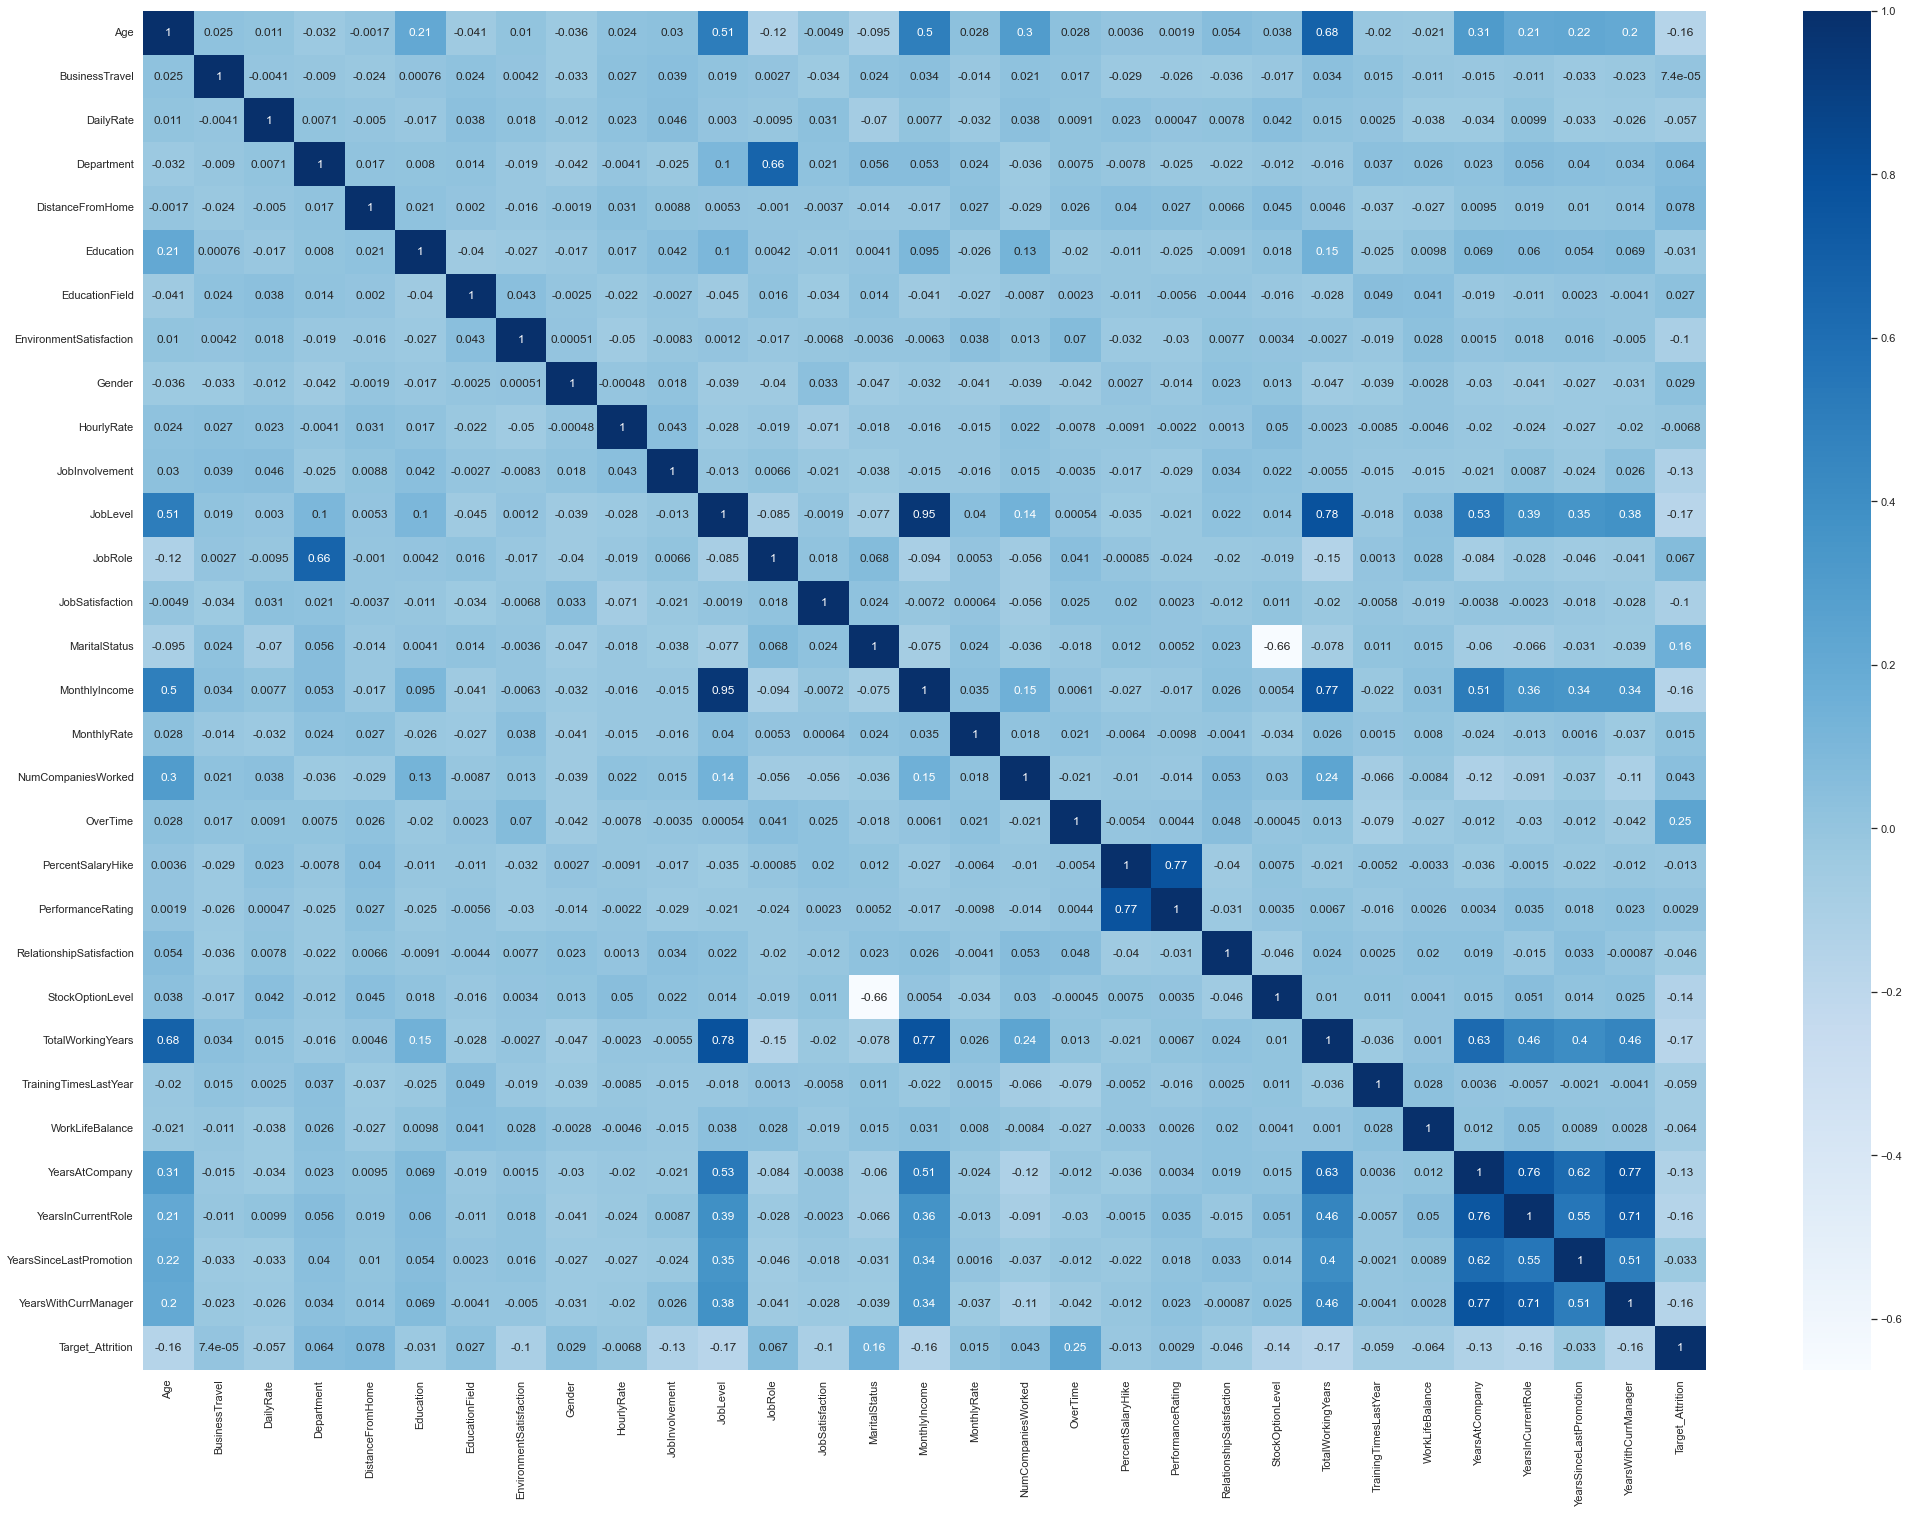

In [44]:
plt.figure(figsize=(35,25))
sns.heatmap(hr.corr(),annot=True,cmap="Blues")
plt.show()

### 1.Correlation between the each colunm with target colunm.

<AxesSubplot:>

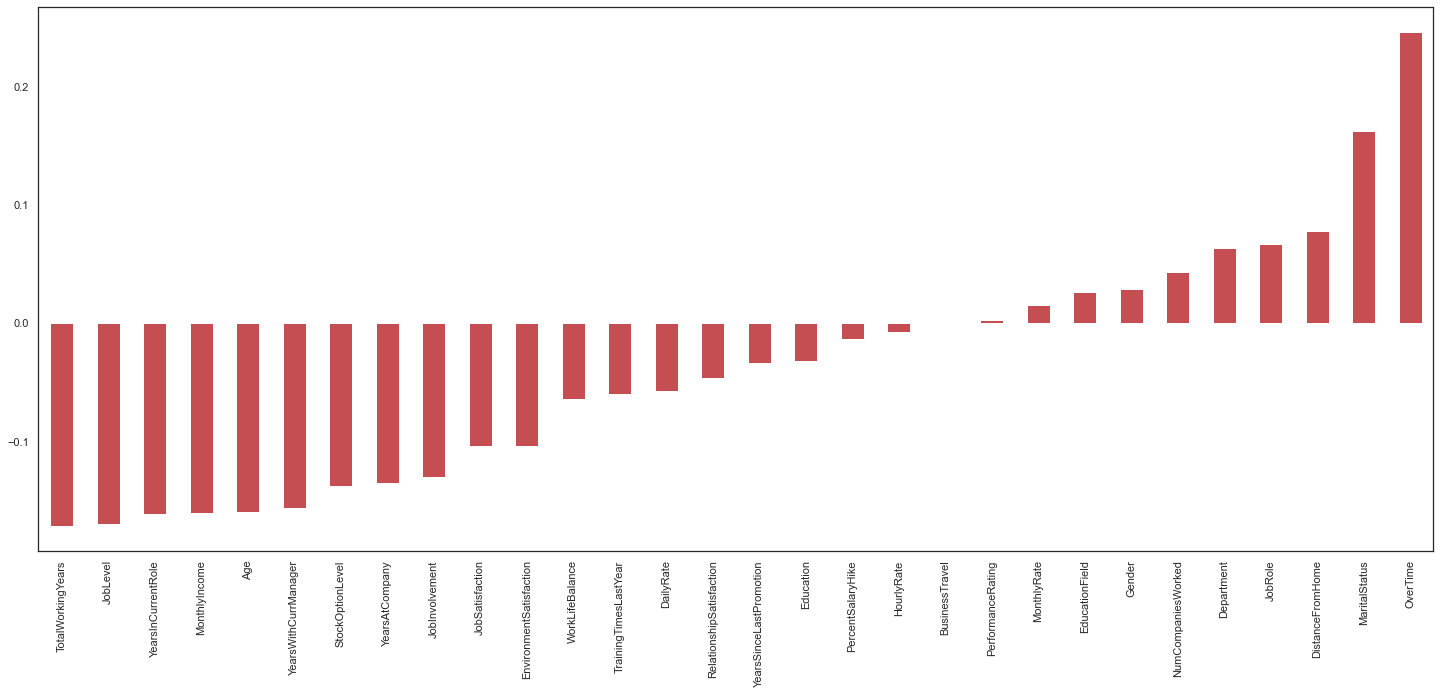

In [45]:
plt.figure(figsize =(25, 10))
hr.corr()['Target_Attrition'].sort_values().drop(['Target_Attrition']).plot(kind ='bar',color='r')

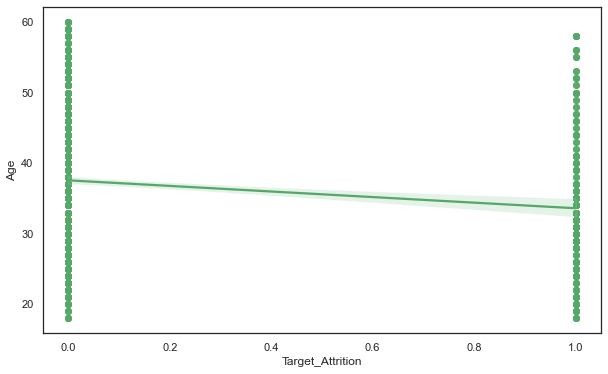

In [46]:
plt.figure(figsize=[10,6])
sns.regplot(data=hr,x='Target_Attrition',y='Age',color='g')
plt.show()

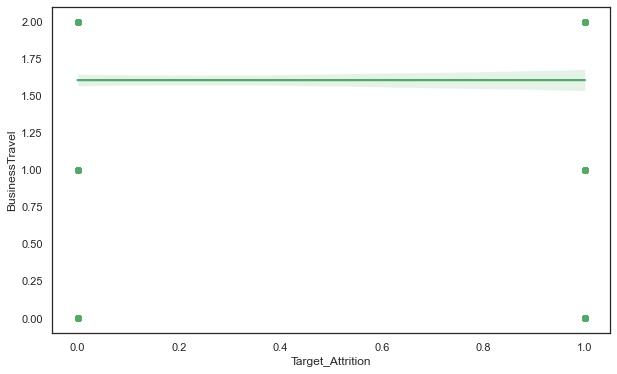

In [47]:
plt.figure(figsize=[10,6])
sns.regplot(data=hr,x='Target_Attrition',y='BusinessTravel',color='g')
plt.show()

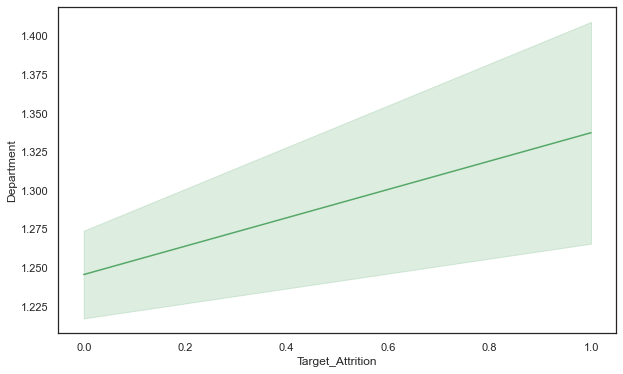

In [48]:
plt.figure(figsize=[10,6])
sns.lineplot(data=hr,x='Target_Attrition',y='Department',color='g')
plt.show()

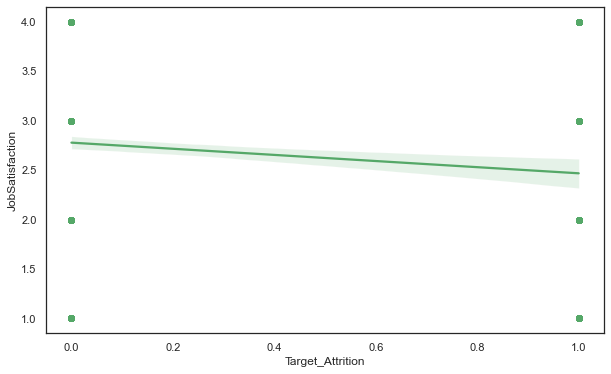

In [49]:
plt.figure(figsize=[10,6])
sns.regplot(data=hr,x='Target_Attrition',y='JobSatisfaction',color='g')
plt.show()

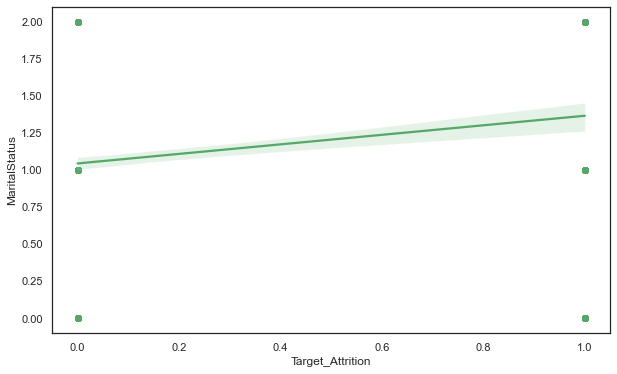

In [50]:
plt.figure(figsize=[10,6])
sns.regplot(data=hr,x='Target_Attrition',y='MaritalStatus',color='g')
plt.show()

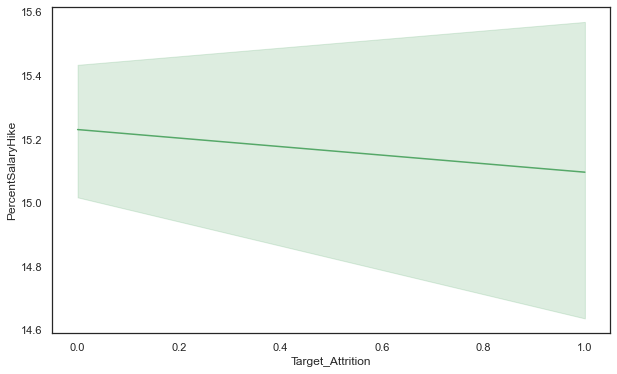

In [51]:
plt.figure(figsize=[10,6])
sns.lineplot(data=hr,x='Target_Attrition',y='PercentSalaryHike',color='g')
plt.show()

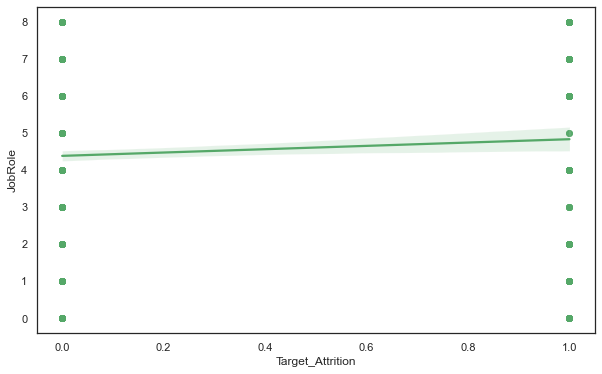

In [52]:
plt.figure(figsize=[10,6])
sns.regplot(data=hr,x='Target_Attrition',y='JobRole',color='g')
plt.show()

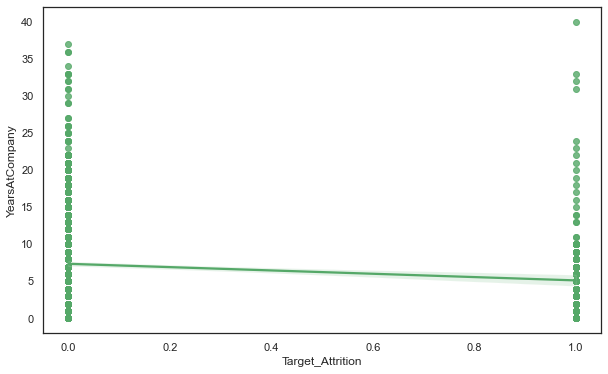

In [53]:
plt.figure(figsize=[10,6])
sns.regplot(data=hr,x='Target_Attrition',y='YearsAtCompany',color='g')
plt.show()

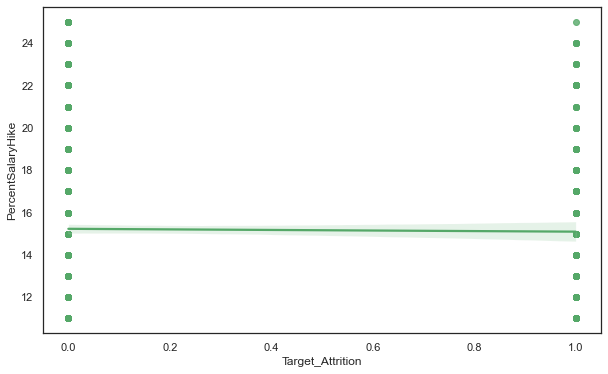

In [54]:
plt.figure(figsize=[10,6])
sns.regplot(data=hr,x='Target_Attrition',y='PercentSalaryHike',color='g')
plt.show()

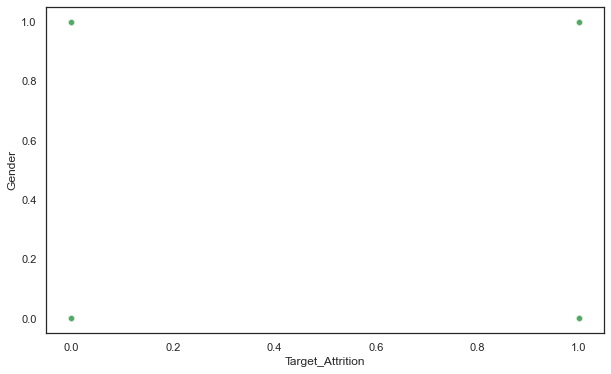

In [55]:
plt.figure(figsize=[10,6])
sns.scatterplot(data=hr,x='Target_Attrition',y='Gender',color='g')
plt.show()

### 2.Correlation between the colunms.

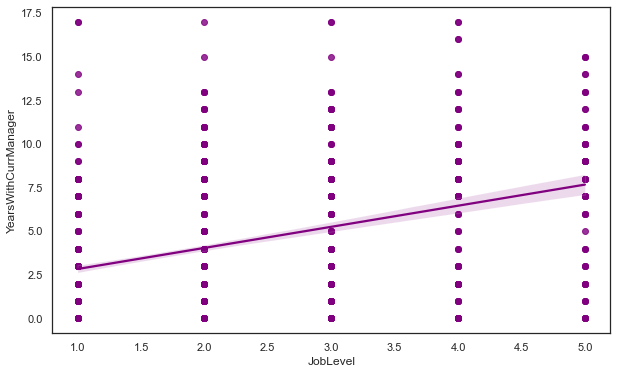

In [56]:
plt.figure(figsize=[10,6])
sns.regplot(data=hr,x='JobLevel',y='YearsWithCurrManager',color='purple')
plt.show()

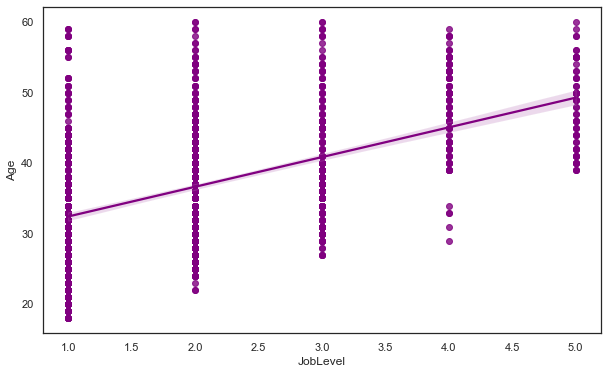

In [57]:
plt.figure(figsize=[10,6])
sns.regplot(data=hr,x='JobLevel',y='Age',color='purple')
plt.show()

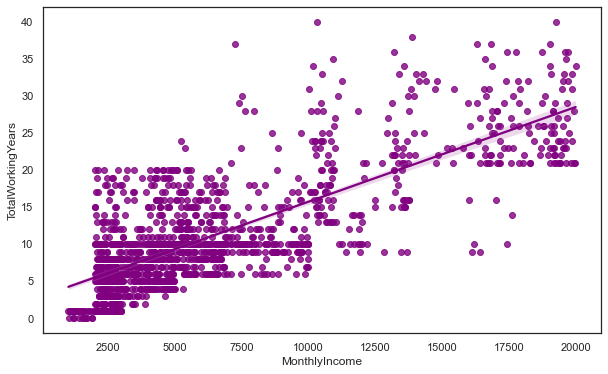

In [58]:
plt.figure(figsize=[10,6])
sns.regplot(data=hr,x='MonthlyIncome',y='TotalWorkingYears',color='purple')
plt.show()

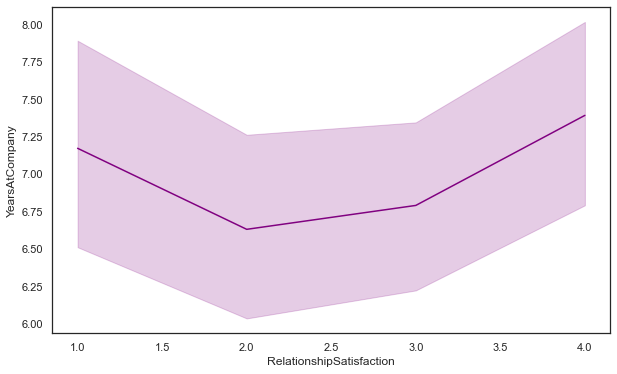

In [59]:
plt.figure(figsize=[10,6])
sns.lineplot(data=hr,x='RelationshipSatisfaction',y='YearsAtCompany',color='purple')
plt.show()

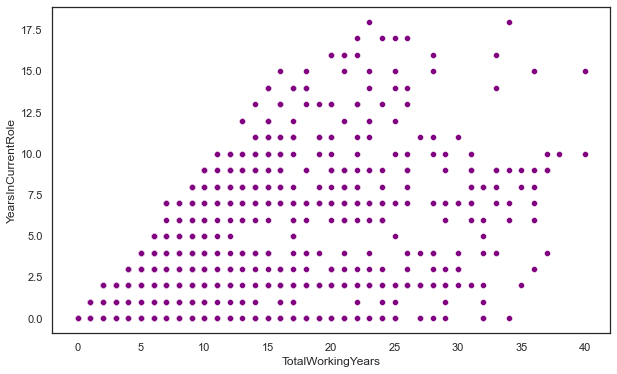

In [60]:
plt.figure(figsize=[10,6])
sns.scatterplot(data=hr,x='TotalWorkingYears',y='YearsInCurrentRole',color='purple')
plt.show()

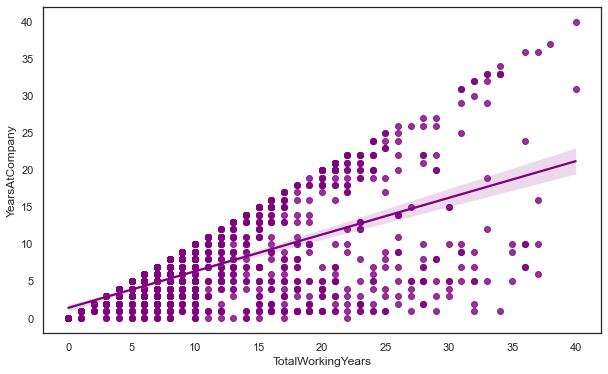

In [61]:
plt.figure(figsize=[10,6])
sns.regplot(data=hr,x='TotalWorkingYears',y='YearsAtCompany',color='purple')
plt.show()

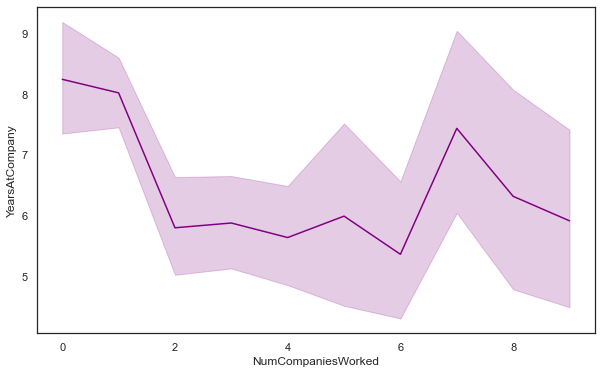

In [62]:
plt.figure(figsize=[10,6])
sns.lineplot(data=hr,x='NumCompaniesWorked',y='YearsAtCompany',color='purple')
plt.show()

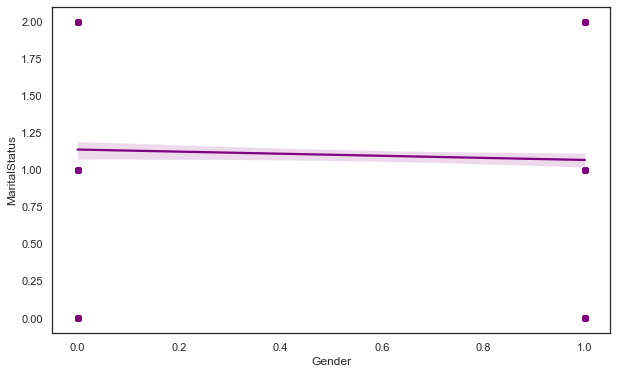

In [63]:
plt.figure(figsize=[10,6])
sns.regplot(data=hr,x='Gender',y='MaritalStatus',color='purple')
plt.show()

### Observation-6

From above result we got three type of correlation:
    
  1. Positive correlation- when one increase another is also increase(both the variables are directly praposnal to each other).
  
    
  2. Negative correlation- when one increase another decrease(inversly prapornal to each other).
  
    
  3. Zero correlation- No correlation.

A. Overtime(0.24) and Target column are positively correleted() with each other, Which can be considered as good bond bond. 

B. Marital status(0.16) and target columns are also positively correleted() with each other.

c. Jobrole(0.06) and Depertment(0.06) both are correleted with Target column.

D. Totalworking year(), joblevel(),YearsInCurrentRole(), Monthely income() and Age() columns are negatively correleted with each other, which can be considerd as poor bond.

E. BusinessTravel, HourlyRate, PercentSalaryHike, PerformanceRating has zero correlation with target column.

H. JobLevel(-0.16) and YearsWithCurrManager(-0.15) columns are high negative correlated with each other.

I. TotalWorkingYears(-0.17) and YearsAtCompany(-0.13) columns are making good correlation with each other.

J. TotalWorkingYears and YearsInCurrentRole columns are making positive correlation with each other, which can be considered as a strong bond.

K. JobLevel and Age are making good correlation with each others.

L. NumCompaniesWorked and JobSatisfaction columns have negative correlation with each other. 

M. TrainingTimesLastYear and NumCompaniesWorked columns have negative correlation with each other.

N. MonthlyIncome and TotalWorkingYears columns are highly correlated with each other.

.

# Data Preprocessing 

In [64]:
x=hr.iloc[:,0:-1]
y=hr.iloc[:,-1]

In [65]:
x.shape

(1470, 30)

In [66]:
y.shape

(1470,)

### Removing Outliers

In [67]:
import scipy
from scipy.stats import zscore

In [68]:
z=np.abs(zscore(x))
z.shape

(1470, 30)

In [69]:
thresehold=3
print(np.where(z>3))

(array([  28,   45,   62,   62,   63,   64,   85,   98,   98,  110,  123,
        123,  123,  126,  126,  126,  153,  178,  187,  187,  190,  190,
        218,  231,  231,  237,  237,  270,  270,  281,  326,  386,  386,
        401,  411,  425,  425,  427,  445,  466,  473,  477,  535,  561,
        561,  584,  592,  595,  595,  595,  616,  624,  635,  653,  653,
        677,  686,  701,  716,  746,  749,  752,  799,  838,  861,  861,
        875,  875,  894,  914,  914,  918,  922,  926,  926,  937,  956,
        962,  976,  976, 1008, 1024, 1043, 1078, 1078, 1086, 1086, 1093,
       1111, 1116, 1116, 1135, 1138, 1138, 1156, 1184, 1221, 1223, 1242,
       1295, 1301, 1301, 1303, 1327, 1331, 1348, 1351, 1401, 1414, 1430],
      dtype=int64), array([29, 28, 26, 28, 27, 28, 23, 23, 26, 28, 27, 28, 29, 23, 26, 28, 29,
       28, 23, 29, 26, 27, 28, 27, 29, 26, 28, 23, 26, 27, 28, 28, 29, 23,
       26, 26, 28, 28, 23, 27, 26, 26, 28, 26, 29, 28, 26, 23, 26, 28, 29,
       23, 29, 26, 28, 

In [70]:
x=x[(z<3).all(axis=1)]

In [71]:
y=y[(z<3).all(axis=1)]

In [72]:
x.shape

(1387, 30)

In [73]:
y.shape

(1387,)

In [74]:
percent_loss=((1470-1387)/1470)*100
print("Loss Percent:",percent_loss)

Loss Percent: 5.646258503401361


### We removed outliers and lost our 5.64 % data which is less then 10. So we can say that this percentage loss is under our maximum range. 

.

## Removing Skewness

Removing Skewness with power transformation technique

In [75]:
pp=x.columns

In [76]:
from sklearn.preprocessing import power_transform

In [77]:
x=power_transform(x,method='yeo-johnson')

In [78]:
x=pd.DataFrame(x,columns=pp)

In [79]:
x.skew()

Age                        -0.004079
BusinessTravel             -0.960583
DailyRate                  -0.199742
Department                  0.015095
DistanceFromHome           -0.008149
Education                  -0.103747
EducationField             -0.008642
EnvironmentSatisfaction    -0.205472
Gender                     -0.417296
HourlyRate                 -0.105678
JobInvolvement             -0.018801
JobLevel                    0.110769
JobRole                    -0.337641
JobSatisfaction            -0.217730
MaritalStatus              -0.158253
MonthlyIncome               0.027700
MonthlyRate                -0.176560
NumCompaniesWorked          0.016175
OverTime                    0.954751
PercentSalaryHike           0.112128
PerformanceRating           0.000000
RelationshipSatisfaction   -0.191406
StockOptionLevel            0.089929
TotalWorkingYears          -0.009666
TrainingTimesLastYear       0.057949
WorkLifeBalance            -0.011133
YearsAtCompany             -0.025230
Y

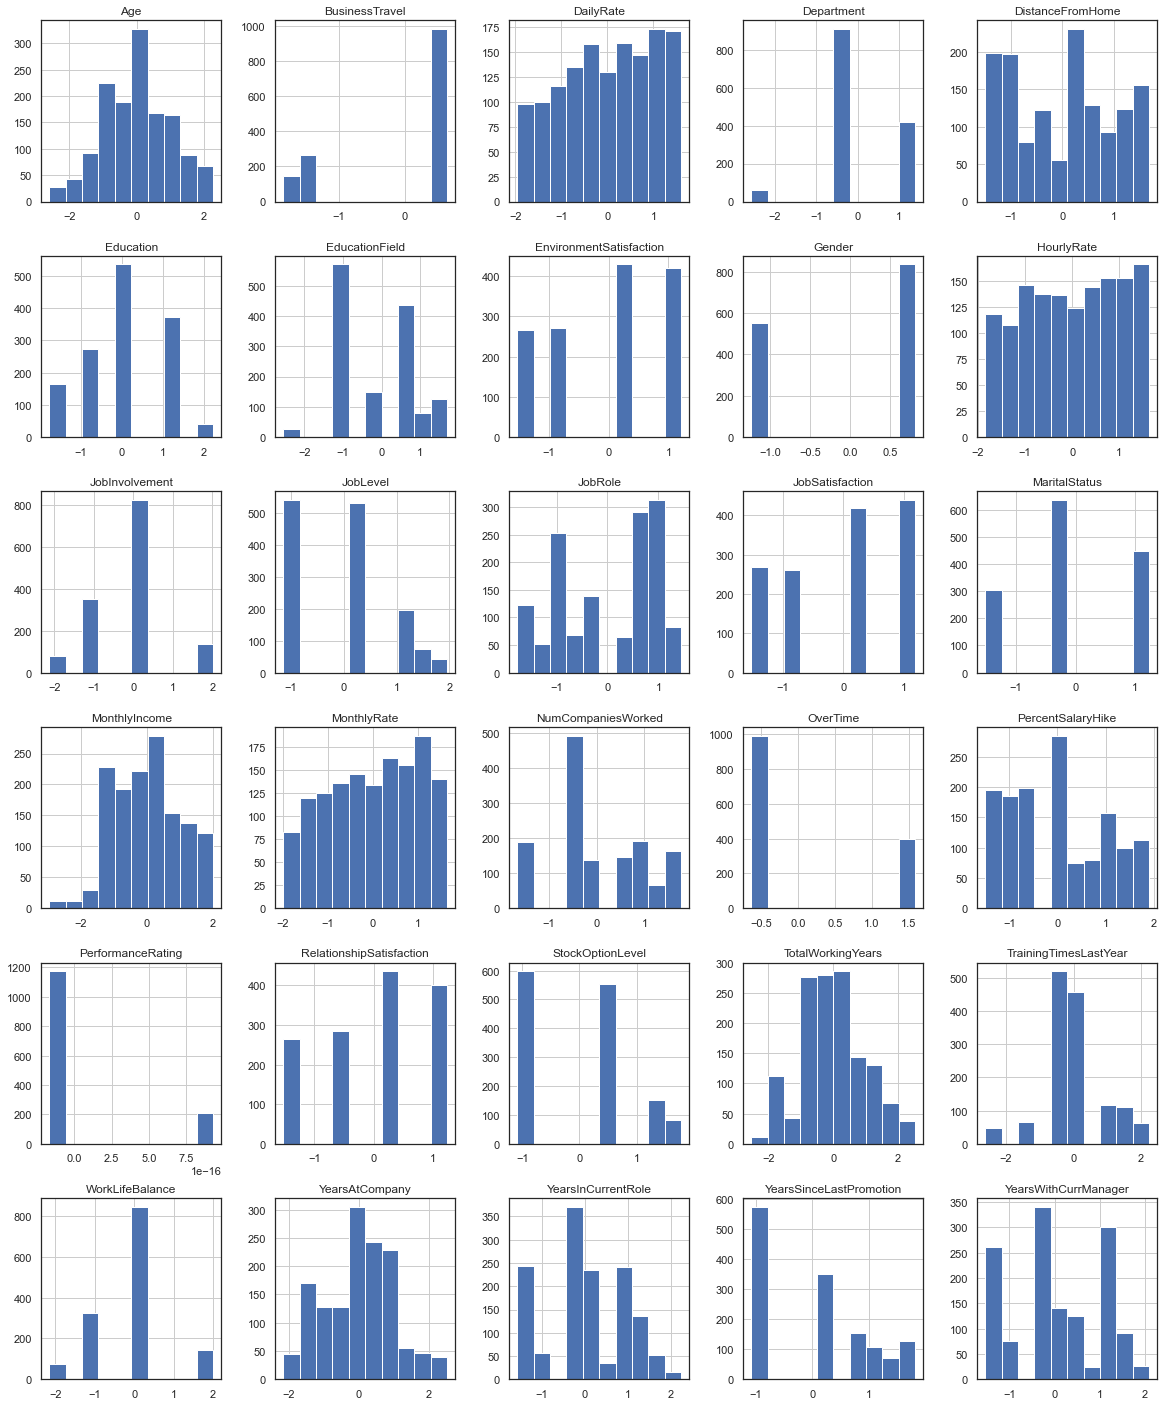

In [80]:
x.hist(figsize=(20,25))
plt.show()

### We removed skewness and now our data is equally distributed.

.

## Scaling the data:

In [81]:
from sklearn.preprocessing import StandardScaler

In [82]:
ss=StandardScaler()

In [83]:
x=ss.fit_transform(x)

In [84]:
x=pd.DataFrame(x,columns=pp)

In [85]:
x.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.610133,0.638730,0.750615,1.379881,-1.489968,-0.902402,-0.965129,-0.712215,-1.229911,1.359498,...,-0.424765,-1.524369,-1.084263,-0.173231,-2.608524,-2.14795,0.231837,0.290524,-1.073534,0.582177
1,1.371830,-1.380776,-1.343372,-0.473500,0.244561,-1.759177,-0.965129,0.204826,0.813067,-0.208763,...,2.354241,1.235448,0.548653,0.147620,0.217074,0.27486,0.948319,1.006575,0.193168,1.018073
2,0.182486,0.638730,1.337080,-0.473500,-1.028366,-0.902402,1.239552,1.210036,0.813067,1.267832,...,-0.424765,-0.690386,-1.084263,-0.351153,0.217074,0.27486,-2.156089,-1.571814,-1.073534,-1.528426
3,-0.284736,-1.380776,1.377080,-0.473500,-0.698191,1.102042,-0.965129,1.210036,-1.229911,-0.458919,...,-0.424765,0.235192,-1.084263,-0.173231,0.217074,0.27486,0.621429,1.006575,1.027520,-1.528426
4,-1.080489,0.638730,-0.467301,-0.473500,-1.028366,-1.759177,0.689982,-1.522916,0.813067,-1.290538,...,-0.424765,1.235448,0.548653,-0.544046,0.217074,0.27486,-0.933983,-0.390769,0.722874,-0.347871


.

# VIF:
### Variance inflation factor:

In [86]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [87]:
def vif(x):
    vif=pd.DataFrame()
    vif['Variables']=x.columns
    vif['VIF Factors']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return vif

In [88]:
vif(x)

,Variables,VIF Factors
0,Age,1.931701
1,BusinessTravel,1.014400
2,DailyRate,1.026448
3,Department,2.172485
4,DistanceFromHome,1.017545
5,Education,1.065983
6,EducationField,1.030483
7,EnvironmentSatisfaction,1.024570
8,Gender,1.024895
9,HourlyRate,1.024263


Because YearsAtCompany and JobLevel are giving high vif factor so we will drop the YearsAtCompany columns

In [89]:
x.drop(['YearsAtCompany'],axis=1,inplace=True)

In [90]:
vif(x)

,Variables,VIF Factors
0,Age,1.929374
1,BusinessTravel,1.014271
2,DailyRate,1.025797
3,Department,2.171812
4,DistanceFromHome,1.017333
5,Education,1.065588
6,EducationField,1.030020
7,EnvironmentSatisfaction,1.024565
8,Gender,1.022696
9,HourlyRate,1.024255


### Adopting SMOTE :

The purpose of smote is to make the imbalanced dataset to the balancing dataset by creating synthathic samples.

In [91]:
from imblearn.over_sampling import SMOTE

<AxesSubplot:xlabel='Target_Attrition', ylabel='count'>

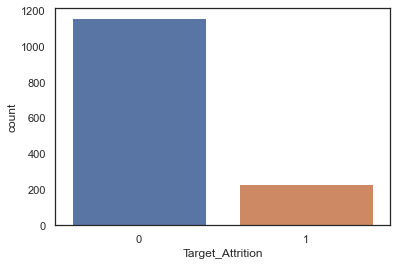

In [92]:
sns.countplot(y)

In [93]:
smt=SMOTE()

In [94]:
x_new,y_new=smt.fit_resample(x,y)

#### New shape 

In [95]:
x_new.shape

(2316, 29)

In [96]:
y_new.shape

(2316,)

#### Old shape

In [97]:
x.shape

(1387, 29)

In [98]:
y.shape

(1387,)

.

<AxesSubplot:xlabel='Target_Attrition', ylabel='count'>

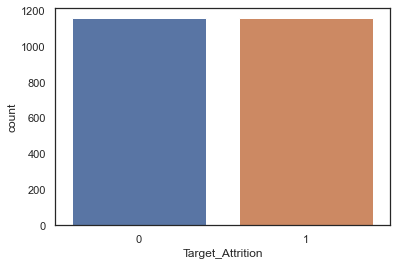

In [99]:
sns.countplot(y_new)

## Model learning phase-prediction phase

So basically it will become important to know which type of machine learning model we are going to construct.It depends on the target.
Now we are going to use classification model because our target column is categorical in nature.

For classification model, Some matrix we are going to find like:

1. confusion matrix
2. classification report
3. Accuracy score

### Importing important lib.

In [104]:
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import xgboost as xg

### Creating a function for finding Best random state 

In [105]:
def model_select(model):
    max_score=0
    max_state=0
    
    for i in range(0,100):
        x_train, x_test, y_train, y_test = train_test_split(x_new,y_new,test_size=0.22, random_state=i)
        md=model()
        md.fit(x_train,y_train)
        predict=md.predict(x_test)
        ac_score=accuracy_score(y_test,predict)
        if ac_score > max_score:
            max_score=ac_score
            max_state=i
    print("Max score is {} at random state {}".format(max_score,max_state))       

## Logistic Regression 

Finding best random state by calling model_select function

In [106]:
model_select(LogisticRegression)

Max score is 0.8411764705882353 at random state 75


In [189]:
x_train, x_test, y_train, y_test = train_test_split(x_new,y_new,test_size=0.22, random_state=75)

In [192]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
print('Accuracy:',accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))


Accuracy: 0.8411764705882353
[[211  45]
 [ 36 218]]
              precision    recall  f1-score   support

           0       0.85      0.82      0.84       256
           1       0.83      0.86      0.84       254

    accuracy                           0.84       510
   macro avg       0.84      0.84      0.84       510
weighted avg       0.84      0.84      0.84       510

Cross validation : 0.8723777618249979


In [197]:
for i in range(3,15):
    cvr=cross_val_score(lr,x,y,cv=i)
    print("Cross validation when cv=",i,"----",cvr.mean())

Cross validation when cv= 3 ---- 0.8673342496236666
Cross validation when cv= 4 ---- 0.8659005347237261
Cross validation when cv= 5 ---- 0.8709451211593902
Cross validation when cv= 6 ---- 0.8709415584415585
Cross validation when cv= 7 ---- 0.8723777618249979
Cross validation when cv= 8 ---- 0.8723963524018337
Cross validation when cv= 9 ---- 0.8694875017455662
Cross validation when cv= 10 ---- 0.8745699092899593
Cross validation when cv= 11 ---- 0.8745327288634376
Cross validation when cv= 12 ---- 0.8709707646176912
Cross validation when cv= 13 ---- 0.8731467791598282
Cross validation when cv= 14 ---- 0.8730952380952381


In [268]:
cvlr=10
Modellr= 84.11 
Cslr= 87.45 
Diffrencelr= 87.45 - 84.11

## Kneighbor Classifier

Finding best random state by calling model_select function

In [201]:
model_select(KNeighborsClassifier)

Max score is 0.8627450980392157 at random state 91


In [202]:
x_train, x_test, y_train, y_test = train_test_split(x_new,y_new,test_size=0.22, random_state=91)

In [203]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
print('Accuracy:',accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 0.8627450980392157
[[157  66]
 [  4 283]]
              precision    recall  f1-score   support

           0       0.98      0.70      0.82       223
           1       0.81      0.99      0.89       287

    accuracy                           0.86       510
   macro avg       0.89      0.85      0.85       510
weighted avg       0.88      0.86      0.86       510



In [204]:
for i in range(3,15):
    cvr=cross_val_score(knn,x,y,cv=i)
    print("Cross validation when cv=",i,"---",cvr.mean())

Cross validation when cv= 3 --- 0.8399405969600354
Cross validation when cv= 4 --- 0.8428228748479951
Cross validation when cv= 5 --- 0.8442614861179647
Cross validation when cv= 6 --- 0.8457076926904513
Cross validation when cv= 7 --- 0.8406643607648633
Cross validation when cv= 8 --- 0.8428219055212278
Cross validation when cv= 9 --- 0.8442768700833216
Cross validation when cv= 10 --- 0.8435460327390262
Cross validation when cv= 11 --- 0.8421049641522083
Cross validation when cv= 12 --- 0.842103948025987
Cross validation when cv= 13 --- 0.8421049062029489
Cross validation when cv= 14 --- 0.8399494949494951


In [270]:
cvknn=6
Modelknn= 86.27 
Csknn= 84.57 
Diffrenceknn= 86.27 - 84.57 

## Naive bayes classifier

Finding best random state by calling model_select function

In [206]:
model_select(GaussianNB)

Max score is 0.792156862745098 at random state 28


In [213]:
x_train, x_test, y_train, y_test = train_test_split(x_new,y_new,test_size=0.22, random_state=28)

In [217]:
gm=GaussianNB()
gm.fit(x_train,y_train)
pred=gm.predict(x_test)
print('Accuracy:',accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

cvr=cross_val_score(gm,x,y,cv=7)
print("Cross validation :",cvr.mean())

Accuracy: 0.792156862745098
[[204  57]
 [ 49 200]]
              precision    recall  f1-score   support

           0       0.81      0.78      0.79       261
           1       0.78      0.80      0.79       249

    accuracy                           0.79       510
   macro avg       0.79      0.79      0.79       510
weighted avg       0.79      0.79      0.79       510

Cross validation : 0.8276773477778503


In [215]:
for i in range(3,15):
    cvr=cross_val_score(gm,x,y,cv=i)
    print("Cross validation when cv=",i,"---",cvr.mean())

Cross validation when cv= 3 --- 0.8319994140728483
Cross validation when cv= 4 --- 0.8327447485465843
Cross validation when cv= 5 --- 0.8327221255486584
Cross validation when cv= 6 --- 0.828391675374434
Cross validation when cv= 7 --- 0.8276773477778503
Cross validation when cv= 8 --- 0.8298410404624277
Cross validation when cv= 9 --- 0.8269468882372109
Cross validation when cv= 10 --- 0.8284068397455948
Cross validation when cv= 11 --- 0.8276692686141505
Cross validation when cv= 12 --- 0.8276674162918539
Cross validation when cv= 13 --- 0.8298767006226007
Cross validation when cv= 14 --- 0.8312770562770562


In [275]:
cvgn=14
Modelgn= 79.21 
Csgn= 83.12 
Diffrencegn=83.12 - 79.21 

## Decision tree classifier

Finding best random state by calling model_select function

In [219]:
model_select(DecisionTreeClassifier)

Max score is 0.8941176470588236 at random state 89


In [220]:
x_train, x_test, y_train, y_test = train_test_split(x_new,y_new,test_size=0.22, random_state=89)

In [224]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred=dtc.predict(x_test)
print('Accuracy:',accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 0.8705882352941177
[[239  41]
 [ 25 205]]
              precision    recall  f1-score   support

           0       0.91      0.85      0.88       280
           1       0.83      0.89      0.86       230

    accuracy                           0.87       510
   macro avg       0.87      0.87      0.87       510
weighted avg       0.87      0.87      0.87       510



In [222]:
for i in range(3,15):
    cvr=cross_val_score(dtc,x,y,cv=i)
    print("Cross validation when cv=",i,"---",cvr.mean())

Cross validation when cv= 3 --- 0.789472946060419
Cross validation when cv= 4 --- 0.7786497809465109
Cross validation when cv= 5 --- 0.7930680726177182
Cross validation when cv= 6 --- 0.793087898691347
Cross validation when cv= 7 --- 0.7757836803062934
Cross validation when cv= 8 --- 0.7699779084446217
Cross validation when cv= 9 --- 0.7822557370944468
Cross validation when cv= 10 --- 0.7953133145657387
Cross validation when cv= 11 --- 0.7902194043926328
Cross validation when cv= 12 --- 0.7988318340829585
Cross validation when cv= 13 --- 0.7794446780516255
Cross validation when cv= 14 --- 0.7837590187590188


In [286]:
cvdt=12
Modeldt= 87.05 
Csdt= 79.88 
Diffrencedt= 87.05 - 79.88 

## Support vector classifier

Finding best random state by calling model_select function

In [226]:
model_select(SVC)

Max score is 0.9450980392156862 at random state 75


In [233]:
x_train, x_test, y_train, y_test = train_test_split(x_new,y_new,test_size=0.22, random_state=75)

In [235]:
svc=DecisionTreeClassifier()
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
print('Accuracy:',accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 0.8705882352941177
[[216  40]
 [ 26 228]]
              precision    recall  f1-score   support

           0       0.89      0.84      0.87       256
           1       0.85      0.90      0.87       254

    accuracy                           0.87       510
   macro avg       0.87      0.87      0.87       510
weighted avg       0.87      0.87      0.87       510



In [236]:
for i in range(3,15):
    cvr=cross_val_score(svc,x,y,cv=i)
    print("Cross validation when cv=",i,"---",cvr.mean())

Cross validation when cv= 3 --- 0.7902022383663853
Cross validation when cv= 4 --- 0.775757525278606
Cross validation when cv= 5 --- 0.7815391008492845
Cross validation when cv= 6 --- 0.8002997959894511
Cross validation when cv= 7 --- 0.7736228037735575
Cross validation when cv= 8 --- 0.7714313002458308
Cross validation when cv= 9 --- 0.7685565330726621
Cross validation when cv= 10 --- 0.7931029089771661
Cross validation when cv= 11 --- 0.7815500335185374
Cross validation when cv= 12 --- 0.7844202898550726
Cross validation when cv= 13 --- 0.7801568031686176
Cross validation when cv= 14 --- 0.7808513708513708


In [284]:
cvsvm=6
Modelsvm= 87.05 
Cssvm= 80 
Diffrencesvm= 87.05 - 80 

# Ensamble technique --
## Bagging and boosting

### Random forest classifier

Finding best random state by calling model_select function

In [138]:
model_select(RandomForestClassifier)

Max score is 0.9627450980392157 at random state 28


In [238]:
x_train, x_test, y_train, y_test = train_test_split(x_new,y_new,test_size=0.22, random_state=28)

In [239]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
pred=rfc.predict(x_test)
print('Accuracy:',accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 0.9509803921568627
[[252   9]
 [ 16 233]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       261
           1       0.96      0.94      0.95       249

    accuracy                           0.95       510
   macro avg       0.95      0.95      0.95       510
weighted avg       0.95      0.95      0.95       510



In [240]:
for i in range(3,15):
    cvr=cross_val_score(rfc,x,y,cv=i)
    print("Cross validation when cv=",i,"---",cvr.mean())

Cross validation when cv= 3 --- 0.8558073795654789
Cross validation when cv= 4 --- 0.85364228481951
Cross validation when cv= 5 --- 0.8601277822507336
Cross validation when cv= 6 --- 0.8550965318206698
Cross validation when cv= 7 --- 0.854361997578078
Cross validation when cv= 8 --- 0.8500431864992359
Cross validation when cv= 9 --- 0.8557976074105107
Cross validation when cv= 10 --- 0.853649254509436
Cross validation when cv= 11 --- 0.8529104316505891
Cross validation when cv= 12 --- 0.8558095952023989
Cross validation when cv= 13 --- 0.8514981756032717
Cross validation when cv= 14 --- 0.8572510822510822


In [278]:
cvrf=5
Modelrf= 95.07 
Csrf= 86 
Diffrencerf =95.07 - 86 

### AdaBoostClassifier

Finding best random state by calling model_select function

In [141]:
model_select(AdaBoostClassifier)

Max score is 0.9294117647058824 at random state 91


In [242]:
x_train, x_test, y_train, y_test = train_test_split(x_new,y_new,test_size=0.22, random_state=91)

In [243]:
ada=AdaBoostClassifier()
ada.fit(x_train,y_train)
pred=ada.predict(x_test)
print('Accuracy:',accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 0.9294117647058824
[[208  15]
 [ 21 266]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       223
           1       0.95      0.93      0.94       287

    accuracy                           0.93       510
   macro avg       0.93      0.93      0.93       510
weighted avg       0.93      0.93      0.93       510



In [244]:
for i in range(3,15):
    cvr=cross_val_score(ada,x,y,cv=i)
    print("Cross validation when cv=",i,"---",cvr.mean())

Cross validation when cv= 3 --- 0.8687850426511333
Cross validation when cv= 4 --- 0.8651988139461279
Cross validation when cv= 5 --- 0.8716749344206945
Cross validation when cv= 6 --- 0.8716568393292531
Cross validation when cv= 7 --- 0.8709311347502302
Cross validation when cv= 8 --- 0.8723963524018338
Cross validation when cv= 9 --- 0.8687660010240655
Cross validation when cv= 10 --- 0.8803409446355959
Cross validation when cv= 11 --- 0.8723739078069788
Cross validation when cv= 12 --- 0.8760119940029986
Cross validation when cv= 13 --- 0.8745981579696973
Cross validation when cv= 14 --- 0.8803102453102453


In [274]:
cvada=14
Modelada =  92.94 
Csada= 88.03 
Diffrenceada=92.94 - 88.03 

### GradientBoostingClassifier

Finding best random state by calling model_select function

In [158]:
model_select(GradientBoostingClassifier)

Max score is 0.9431372549019608 at random state 91


In [246]:
x_train, x_test, y_train, y_test = train_test_split(x_new,y_new,test_size=0.22, random_state=91)

In [247]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
pred=gbc.predict(x_test)
print('Accuracy:',accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 0.9431372549019608
[[217   6]
 [ 23 264]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.94       223
           1       0.98      0.92      0.95       287

    accuracy                           0.94       510
   macro avg       0.94      0.95      0.94       510
weighted avg       0.95      0.94      0.94       510



In [248]:
for i in range(3,15):
    cvr=cross_val_score(gbc,x,y,cv=i)
    print("Cross validation when cv=",i,"---",cvr.mean())

Cross validation when cv= 3 --- 0.8579703234130879
Cross validation when cv= 4 --- 0.8630249371158235
Cross validation when cv= 5 --- 0.8637326961535464
Cross validation when cv= 6 --- 0.8622990993680649
Cross validation when cv= 7 --- 0.8659277629126875
Cross validation when cv= 8 --- 0.8594279449870441
Cross validation when cv= 9 --- 0.8587068845133361
Cross validation when cv= 10 --- 0.8623084141382547
Cross validation when cv= 11 --- 0.8630171228596427
Cross validation when cv= 12 --- 0.8579835082458772
Cross validation when cv= 13 --- 0.8630210382105991
Cross validation when cv= 14 --- 0.8658946608946608


In [279]:
cvgb=7
Modelgb = 94.31 
Csgb= 86.59 
Diffrencegb=94.31 - 86.59

## Xg boost Classifier

Finding best random state by calling model_select function

In [149]:
model_select(xg.XGBClassifier)

Max score is 0.9529411764705882 at random state 28


In [250]:
x_train, x_test, y_train, y_test = train_test_split(x_new,y_new,test_size=0.22, random_state=28)

In [251]:
xb=xg.XGBClassifier()
xb.fit(x_train,y_train)
pred=xb.predict(x_test)
print('Accuracy:',accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 0.9529411764705882
[[253   8]
 [ 16 233]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       261
           1       0.97      0.94      0.95       249

    accuracy                           0.95       510
   macro avg       0.95      0.95      0.95       510
weighted avg       0.95      0.95      0.95       510



In [252]:
for i in range(3,15):
    cvr=cross_val_score(xb,x,y,cv=i)
    print("Cross validation when cv=",i,"---",cvr.mean())

Cross validation when cv= 3 --- 0.8615669188023399
Cross validation when cv= 4 --- 0.8630311838883244
Cross validation when cv= 5 --- 0.8608472067111654
Cross validation when cv= 6 --- 0.8651913220878739
Cross validation when cv= 7 --- 0.8586910019070823
Cross validation when cv= 8 --- 0.8586804863464221
Cross validation when cv= 9 --- 0.8644602709118838
Cross validation when cv= 10 --- 0.8652017516421644
Cross validation when cv= 11 --- 0.8702321300746498
Cross validation when cv= 12 --- 0.8658983008495752
Cross validation when cv= 13 --- 0.867368392496236
Cross validation when cv= 14 --- 0.8623088023088022


In [315]:
cvxg=11
Modelxg=95.29
Csxg=87.02
Diffrencexg=95.29-87.02

## Comparison of all the models

In [317]:
kk={'CV':[cvlr,cvknn,cvgn,cvdt,cvsvm,cvrf,cvada,cvgb,cvxg],
                 'Model_accuracy':[Modellr,Modelknn,Modelgn,Modeldt,Modelsvm,Modelrf,Modelada,Modelgb,Modelxg],
                 'Cross validation Score':[Cslr,Csknn,Csgn,Csdt,Cssvm,Csrf,Csada,Csgb,Csxg],
 'Diffrence':[Diffrencelr,Diffrenceknn,Diffrencegn,Diffrencedt,Diffrencesvm,Diffrencerf,Diffrenceada,Diffrencegb,Diffrencexg]
 }

In [318]:
result=pd.DataFrame(kk,index=['Logistic','kneighbour','GussianNB','Decision tree',
                              'Support vector machine','Random forest','Adaboost','Grediant boosting','xgboost'])

In [319]:
result

,CV,Model_accuracy,Cross validation Score,Diffrence
Logistic,10,84.11,87.45,3.34
kneighbour,6,86.27,84.57,1.70
GussianNB,14,79.21,83.12,3.91
Decision tree,12,87.05,79.88,7.17
Support vector machine,6,87.05,80.00,7.05
Random forest,5,95.07,86.00,9.07
Adaboost,14,92.94,88.03,4.91
Grediant boosting,7,94.31,86.59,7.72
xgboost,11,95.29,87.02,8.27


# Best Model

## We are chosing KNeighbors Regressor as a best model, Because this model has least diffrence between model acuracy score and cross validation score and also its accuracy is good as compare to others.
### Model accuracy is : 86.27
### Cross_validation score : 84.57
### Diffrence : 1.70

.

## Hyper Parameter tuning

### Grid search cv

In [367]:
parameter = [{'n_neighbors': [2,3,4,5,6,7,9,11,13,15],
         'weights': ['uniform', 'distance'],
         'leaf_size': [15, 20],
              'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}]

In [368]:
GSC=GridSearchCV(knn,parameter,cv=12)
GSC.fit(x_train,y_train)
GSC.best_params_

{'algorithm': 'auto', 'leaf_size': 15, 'n_neighbors': 2, 'weights': 'uniform'}

In [369]:
GSC.best_estimator_

KNeighborsClassifier(leaf_size=15, n_neighbors=2)

In [370]:
GSC_pred=GSC.best_estimator_.predict(x_test)
accuracy_score(y_test,GSC_pred)

0.9098039215686274

In [383]:
knn_model=KNeighborsClassifier(leaf_size=15, n_neighbors=2)
knn_model.fit(x_train,y_train)
pred=knn_model.predict(x_test)
print('Accuracy:',accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 0.9098039215686274
[[219  42]
 [  4 245]]
              precision    recall  f1-score   support

           0       0.98      0.84      0.90       261
           1       0.85      0.98      0.91       249

    accuracy                           0.91       510
   macro avg       0.92      0.91      0.91       510
weighted avg       0.92      0.91      0.91       510



# we have done with Grid search CV and we got our best model Kneighbor classifier with 90.98 % accuracy.

# AUC_ROC Curve

In [384]:
import sklearn
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [385]:
y_pred_prob=GSC.best_estimator_.predict_proba(x_test)[:,-1]

In [386]:
y_pred_prob

array([9.58693121e-01, 9.75287861e-01, 8.22155111e-01, 1.56442416e-01,
       6.90594248e-01, 4.63100922e-01, 1.51542345e-02, 7.33242872e-01,
       8.29436954e-01, 1.63029209e-02, 4.88165161e-01, 5.78441302e-01,
       9.06784271e-02, 1.40203721e-02, 9.35934869e-01, 4.40735297e-03,
       9.69103629e-01, 5.38923076e-02, 7.15877927e-01, 8.95805993e-01,
       1.08087092e-01, 6.50257050e-02, 4.10896422e-01, 3.42687463e-01,
       6.72195203e-01, 9.51124962e-02, 5.00653002e-01, 9.84767863e-01,
       8.14182707e-01, 7.60281917e-01, 3.48434242e-01, 7.08512535e-02,
       9.84760568e-01, 4.15860601e-02, 7.71772989e-01, 7.49064571e-01,
       1.50777047e-01, 1.27063836e-01, 1.88736805e-01, 7.06748938e-02,
       9.83056073e-02, 6.62621404e-01, 3.38416421e-01, 7.87586785e-01,
       2.46056317e-02, 9.29840341e-01, 9.84311527e-01, 3.45368519e-01,
       1.24402658e-01, 4.59680505e-01, 5.59804535e-02, 6.03545479e-02,
       9.77464076e-01, 8.95713072e-01, 8.59120289e-01, 1.77230322e-01,
      

In [387]:
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob)

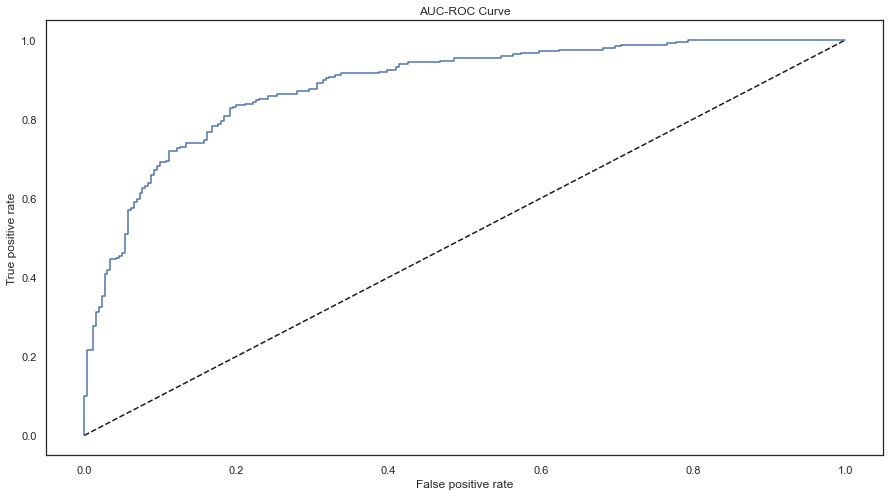

In [391]:
plt.figure(figsize=[15,8])
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='KNeighborsClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title("AUC-ROC Curve")
plt.show()

In [404]:
auc_score=roc_auc_score(y_test,GSC.best_estimator_.predict(x_test))

In [405]:
auc_score

0.8050131560725661

## Saving the model

In [392]:
import joblib

In [393]:
joblib.dump(knn_model,'HR Analytics.pkl')

['HR Analytics.pkl']

### Prediction

In [395]:
model=joblib.load('HR Analytics.pkl')

In [397]:
prediction=model.predict(x_test)

In [402]:
pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=['Predicted','Original'])

,0,1,2,3,4,5,6,7,8,9,...,500,501,502,503,504,505,506,507,508,509
Predicted,1,1,1,0,1,0,0,1,1,0,...,0,1,0,1,1,1,0,1,0,0
Original,1,1,1,1,1,0,0,1,1,0,...,0,1,0,1,1,1,0,1,0,0


# Conclusion -

From the above observations we are concluding that
    
   1. we had not any null values in data set, So we did not adopt simple imputer.
   
    
   2. In order to replace the object data to the int values we used encoading technique.
   

   3. Some columns we dropped, because they was not more contributing to make prediction.
   
    
   4. In our data set Some skewness and outliers was present, To remove this we used zscore method for outliers removing and power transformation method for skewness removing.
   

   5. For scaling the data set we used standard scaler technique.
   
    
   6. Our data set was imbalanced, for balancing it SMOTE has been used.
   

   7. We used many classifier for predicting -
    
    like- 
          Logistic Regression
          k nearest neighbour classifier
          Naive bayes classifier(GaussianNB)
          Design tree classifier
          Support vector machine classifier 
          
   8. In order to control overfitting and underfitting we adopted Cross validation.
   
   
   9. For Bagging and boosting we have used Random forest classifier,Adaboost classifier and Gradient boosting classifier and xgboost classifier.
   
    
   10. We have plotted AUC-ROC curve to plot confusion matrix and the Score of AUC-ROC curve is 80 %.
   
   11. we worked on Hyper parameter tuning on kneighbor classifier classifier for boosting our model accuracy. 
   
   
   
## Finally we got our best model Which is K Neighbor classifier, it gave the 90.98 % accuracy. Which can be considered as good accuracy.
   ### Now our model is ready to predict.
